# EE 559 Project
Ronald Huang & Henry Chen

# Table of Contents
**Section 1:** Import Libraries

**Section 2:** Data Import

**Section 3:** Data Preprocessing

$\;\;\;\;\;\;$**Section 3.1:** One-Hot Encoding

$\;\;\;\;\;\;$**Section 3.2:** Label Encoding

$\;\;\;\;\;\;$**Section 3.2:** Data Imputation

**Section 4:** Exploratory Data Analysis

$\;\;\;\;\;\;$**Section 4.1:** Correlation Matrix

$\;\;\;\;\;\;$**Section 4.2:** Target Variable Distribtion

$\;\;\;\;\;\;$**Section 4.3:** Target Variable Boxplot

$\;\;\;\;\;\;$**Section 4.4:** Numerical Features vs Target Variable

$\;\;\;\;\;\;$**Section 4.5:** Frequency of Occurance of Categorical Features

**Section 5:** Baseline Model on Entire Raw Dataset

**Section 6:** Feature Engineering and Reduction

$\;\;\;\;\;\;$**Section 6.1:** Path 1: Polynomial Feature Mapping and PCA (Not Used)

$\;\;\;\;\;\;\;\;\;\;\;\;$**Section 6.1.1:** 2nd Order Polynomial Feature Mapping

$\;\;\;\;\;\;\;\;\;\;\;\;$**Section 6.1.1:** PCA on Polynomial Mapped Features

$\;\;\;\;\;\;\;\;\;\;\;\;$**Section 6.1.2:** Choosing Principle Components

$\;\;\;\;\;\;\;\;\;\;\;\;$**Section 6.1.3:** Running Baseline on New Features

$\;\;\;\;\;\;$**Section 6.2:** Path 2: Statistical Feature Reduction and PCA (Used)

$\;\;\;\;\;\;\;\;\;\;\;\;$**Section 6.2.1:** Sequential Feature Selection With Linear Regression

$\;\;\;\;\;\;\;\;\;\;\;\;$**Section 6.2.2:** Sequential Feature Selection with Nearest Neighbours

$\;\;\;\;\;\;\;\;\;\;\;\;$**Section 6.2.3:** Univariate Feature Selection with Linear Regression

$\;\;\;\;\;\;\;\;\;\;\;\;$**Section 6.2.4:** PCA on Reduced Features

**Section 7:** Train Test Split on Final Dataset

**Section 8:** Model Selection

$\;\;\;\;\;\;$**Section 8.1:** Trivial Solution

$\;\;\;\;\;\;$**Section 8.2:** K-Fold Cross Validation Function

$\;\;\;\;\;\;$**Section 8.3:** Baseline Models

$\;\;\;\;\;\;\;\;\;\;\;\;$**Section 8.3.1:** Linear Regression

$\;\;\;\;\;\;\;\;\;\;\;\;$**Section 8.3.2:** 1NN

$\;\;\;\;\;\;$**Section 8.4:** In-Class Models

$\;\;\;\;\;\;\;\;\;\;\;\;$**Section 8.4.1:** Lasso Regression (L1)

$\;\;\;\;\;\;\;\;\;\;\;\;$**Section 8.4.2:** Ridge Regression (L2)

$\;\;\;\;\;\;\;\;\;\;\;\;$**Section 8.4.3:** KNN Regression

$\;\;\;\;\;\;\;\;\;\;\;\;$**Section 8.4.4:** Support Vector Regression (SVR)

$\;\;\;\;\;\;\;\;\;\;\;\;$**Section 8.4.5:** Multi-Layer Perceptron MLP

$\;\;\;\;\;\;\;\;\;\;\;\;$**Section 8.4.6:** K-Means Clustering + RBF Network

$\;\;\;\;\;\;$**Section 8.5:** Outside-of-Class Models

$\;\;\;\;\;\;\;\;\;\;\;\;$**Section 8.5.1:** Random Forest

$\;\;\;\;\;\;\;\;\;\;\;\;$**Section 8.5.2:** LightGBM (Gradient Boosting)

**Section 9:** Results

**Section 10:** Final Prediction on Testset

### Import Libraries

In [2]:
# Import packages
import math
import numpy as np
import pandas as pd
import seaborn as sns

# For Computing Priors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import SelectKBest, f_regression

# For Model Selection
import warnings
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.svm import SVC, SVR
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.cluster import KMeans
import lightgbm as lgb
g
# Pytorch
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# For Plotting
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

### Data Import

In [3]:
#Read in data
data_path = 'data/FLIR_groups1and2_train.csv'

read_data = pd.read_csv(data_path, skiprows = 2)
training_data_set = read_data.iloc[:, 2:]

#Seperate by Rounds
round_1 = training_data_set.iloc[:, :27]
round_2 = training_data_set.iloc[:, 28:55]
round_3 = training_data_set.iloc[:, 56:83]
round_4 = training_data_set.iloc[:, 84:111]

### Data Preprocessing

In [4]:
#seperate extra features
catagorical_features = training_data_set[['Gender', 'Age', 'Ethnicity',]]

extra_features = training_data_set[['T_atm', 'Humidity', 'Distance']]

target = training_data_set['aveOralM']

#### One-Hot Encoding

In [5]:
# One-Hot-Encoding
catagorical_features_copy = catagorical_features.copy()

# extra_features = pd.get_dummies(extra_features, columns=['Gender', 'Age', 'Ethnicity'])
catagorical_features_ohe = pd.get_dummies(catagorical_features_copy, columns=['Gender', 'Age', 'Ethnicity'], dtype=int)

catagorical_features_ohe

,Gender_Female,Gender_Male,Age_18-20,Age_21-25,Age_21-30,Age_26-30,Age_31-40,Age_41-50,Age_51-60,Age_>60,Ethnicity_American Indian or Alaskan Native,Ethnicity_Asian,Ethnicity_Black or African-American,Ethnicity_Hispanic/Latino,Ethnicity_Multiracial,Ethnicity_White
0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
4,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
706,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
707,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0
708,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [6]:
# Clean 'Distance' column and replace non-numeric characters with NaN
extra_features = extra_features.copy()
extra_features['Distance'] = pd.to_numeric(extra_features['Distance'], errors='coerce')

# Calculate the mean of the 'Distance' column
mean_distance = extra_features['Distance'].mean()

# Replace values greater than 1 with the mean
extra_features.loc[extra_features['Distance'] > 1, 'Distance'] = mean_distance

In [7]:
#standardize the extra features
extra_features_stand = (extra_features - extra_features.mean()) / extra_features.std()
extra_features_stand

,T_atm,Humidity,Distance
0,0.062470,-0.135970,1.858188
1,0.062470,-0.282998,1.858188
2,0.062470,-0.282998,1.858188
3,0.062470,-0.209484,1.858188
4,0.062470,-0.209484,1.858188
...,...,...,...
705,0.356691,-1.201922,-0.867774
706,0.356691,-1.113706,-0.458880
707,-1.408633,0.011058,-0.867774
708,-1.408633,0.011058,-0.867774


##### Label Encoding (Not Used)

In [8]:
# # Label Encoding - We attempted label encoding for categorical features but results were not as good as one-hot encoded

# extra_features_copy = extra_features.copy()
# label_encoder = LabelEncoder()

# extra_features_copy['Gender_encoded'] = label_encoder.fit_transform(extra_features_copy['Gender'])
# extra_features_copy['Age_encoded'] = label_encoder.fit_transform(extra_features_copy['Age'])
# extra_features_copy['Ethnicity_encoded'] = label_encoder.fit_transform(extra_features_copy['Ethnicity'])

# extra_features_copy = extra_features_copy.drop(['Gender','Age','Ethnicity'], axis=1)

# # Display the encoded DataFrame
# extra_features_copy

#### Data Imputation

In [9]:
#Function to find empty rows 
def find_empty(round):
    empty_rows = []
    
    for i, row in round.iterrows():
        if row.isnull().all() or row.isna().any().any():
            empty_rows.append(i)
            
    return empty_rows
    
#find empty rows in each round
round_1_empty_rows = find_empty(round_1)
round_2_empty_rows = find_empty(round_2)
round_3_empty_rows = find_empty(round_3)
round_4_empty_rows = find_empty(round_4)

#Compute the means of every feature
round_1_means = (round_1.mean()).values  #dtype is float64
round_2_means = (round_2.mean()).values
round_3_means = (round_3.mean()).values
round_4_means = (round_4.mean()).values

In [10]:
#Function to insert means into missing rows 
def insert_mean(round_num, empty_rows, mean):
    rounds_final = round_num
    
    for i in empty_rows:
        rounds_final.loc[i] = mean

    return rounds_final  
    
#insert mean array into each empty row
final_round_1 = insert_mean(round_1, round_1_empty_rows, round_1_means)
final_round_2 = insert_mean(round_2, round_2_empty_rows, round_2_means)
final_round_3 = insert_mean(round_3, round_3_empty_rows, round_3_means)
final_round_4 = insert_mean(round_4, round_4_empty_rows, round_4_means)

#check if there are any empty rows after inserting
test_empty_1 = find_empty(final_round_1)
print(test_empty_1)
test_empty_2 = find_empty(final_round_2)
print(test_empty_2)
test_empty_3 = find_empty(final_round_3)
print(test_empty_3)
test_empty_4 = find_empty(final_round_4)
print(test_empty_4)

# test_empty_extra = find_empty(extra_features)
# print(test_empty_extra)

[]
[]
[]
[]


In [11]:
# Build and standardise dataset with means from the 4 rounds (NO encoded features yet)
final_dataset_means = pd.DataFrame()

for i in range(final_round_1.iloc[0, :].size):
    avg_values = (final_round_1.iloc[:, i] + final_round_2.iloc[:, i] + final_round_3.iloc[:, i] + final_round_4.iloc[:, i]) / 4
    
    final_dataset_means = pd.concat([final_dataset_means, avg_values], axis = 1)

# Standardise data set
# final_dataset_means_stand has standardized features WITHOUT encoded features or labels
final_dataset_means_stand = (final_dataset_means - final_dataset_means.mean()) / final_dataset_means.std()

col_names = ['T_offset_1','Max1R13_1','Max1L13_1','aveAllR13_1','aveAllL13_1','T_RC_1','T_RC_Dry_1','T_RC_Wet_1','T_RC_Max_1','T_LC_1','T_LC_Dry_1','T_LC_Wet_1','T_LC_Max_1','RCC_1','LCC_1','canthiMax_1','canthi4Max_1','T_FHCC_1','T_FHRC_1','T_FHLC_1','T_FHBC_1','T_FHTC_1','T_FH_Max_1','T_FHC_Max_1','T_Max_1','T_OR_1','T_OR_Max_1']

final_dataset_means_stand.columns = col_names
print(f"final_dataset_means_stand shape: {final_dataset_means_stand.shape}")

#features_plus_extra has standardized features AND standardized extra features without encoded features or labels
features_plus_extra = pd.concat([final_dataset_means_stand, extra_features_stand], axis = 1)

print(f"feature_plus_extra shape: {features_plus_extra.shape}")
features_plus_extra


final_dataset_means_stand shape: (710, 27)
feature_plus_extra shape: (710, 30)


,T_offset_1,Max1R13_1,Max1L13_1,aveAllR13_1,aveAllL13_1,T_RC_1,T_RC_Dry_1,T_RC_Wet_1,T_RC_Max_1,T_LC_1,...,T_FHBC_1,T_FHTC_1,T_FH_Max_1,T_FHC_Max_1,T_Max_1,T_OR_1,T_OR_Max_1,T_atm,Humidity,Distance
0,-0.721540,-0.990720,-0.371420,-0.685640,-0.095595,-1.230225,-1.064954,-1.395203,-1.196208,-0.508548,...,-1.455076,-2.134077,-1.662317,-1.815942,-0.791048,-0.286742,-0.316433,0.062470,-0.135970,1.858188
1,-0.491898,-1.885449,-2.037936,-1.380633,-1.224645,-1.764973,-1.727292,-1.628103,-1.760348,-2.045221,...,-0.714249,-0.731523,-1.360446,-0.660159,-1.908290,-1.321512,-1.355600,0.062470,-0.282998,1.858188
2,-0.247441,0.169632,-0.099335,-0.866782,-0.287167,0.130950,0.217444,0.225591,0.136329,-0.182437,...,0.604501,0.204682,-0.049040,0.336205,-0.316086,0.142426,0.126881,0.062470,-0.282998,1.858188
3,-0.047431,-0.631896,0.085293,-0.707821,0.442436,-0.797566,-0.660975,-0.720268,-0.821736,0.000382,...,-0.198385,0.551814,0.460677,0.500052,-0.731678,-1.564707,-1.593942,0.062470,-0.209484,1.858188
4,-0.151140,-0.030750,0.187325,0.068501,0.638084,-0.029474,-0.144258,0.140036,-0.014433,0.089322,...,0.371781,-0.976970,0.094473,0.601903,-0.353867,-0.377344,-0.383169,0.062470,-0.209484,1.858188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705,-0.040023,-0.151912,-0.075042,0.053714,0.022609,-0.102394,0.024850,-0.686997,-0.033886,-0.123144,...,0.336873,0.190656,-0.425141,0.150217,-0.164961,-0.048315,-0.016123,0.356691,-1.201922,-0.867774
706,-0.269665,0.174292,-0.070183,0.486236,0.377220,-0.010029,0.090614,-0.021568,0.014747,-0.133026,...,0.856615,0.537789,0.460677,0.274209,0.660826,0.738492,0.717967,0.356691,-1.113706,-0.458880
707,0.071094,2.182772,1.732375,2.009306,1.856805,2.138685,2.185667,2.174347,2.115681,1.660583,...,0.383417,0.611423,1.658263,0.473482,1.886013,1.902012,1.933507,-1.408633,0.011058,-0.867774
708,0.374813,2.578876,2.913027,2.245899,2.455976,2.542176,2.570856,2.516567,2.529060,2.876086,...,1.539262,1.288155,1.633519,1.390138,2.307002,1.797105,1.761901,-1.408633,0.011058,-0.867774


In [12]:
# Build final dataset with encoded features
preprocessed_dataset_nolabel = pd.concat([features_plus_extra, catagorical_features_ohe], axis=1)

#preprocessed_dataset has all standardized features + encoded features + label
preprocessed_dataset = pd.concat([preprocessed_dataset_nolabel, target], axis=1)

print(preprocessed_dataset.shape)
preprocessed_dataset


(710, 47)


,T_offset_1,Max1R13_1,Max1L13_1,aveAllR13_1,aveAllL13_1,T_RC_1,T_RC_Dry_1,T_RC_Wet_1,T_RC_Max_1,T_LC_1,...,Age_41-50,Age_51-60,Age_>60,Ethnicity_American Indian or Alaskan Native,Ethnicity_Asian,Ethnicity_Black or African-American,Ethnicity_Hispanic/Latino,Ethnicity_Multiracial,Ethnicity_White,aveOralM
0,-0.721540,-0.990720,-0.371420,-0.685640,-0.095595,-1.230225,-1.064954,-1.395203,-1.196208,-0.508548,...,1,0,0,0,0,0,0,0,1,36.59
1,-0.491898,-1.885449,-2.037936,-1.380633,-1.224645,-1.764973,-1.727292,-1.628103,-1.760348,-2.045221,...,0,0,0,0,0,1,0,0,0,37.19
2,-0.247441,0.169632,-0.099335,-0.866782,-0.287167,0.130950,0.217444,0.225591,0.136329,-0.182437,...,0,0,0,0,0,0,0,0,1,37.34
3,-0.047431,-0.631896,0.085293,-0.707821,0.442436,-0.797566,-0.660975,-0.720268,-0.821736,0.000382,...,0,0,0,0,0,1,0,0,0,37.09
4,-0.151140,-0.030750,0.187325,0.068501,0.638084,-0.029474,-0.144258,0.140036,-0.014433,0.089322,...,0,0,0,0,0,0,0,0,1,37.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705,-0.040023,-0.151912,-0.075042,0.053714,0.022609,-0.102394,0.024850,-0.686997,-0.033886,-0.123144,...,0,0,0,0,0,0,0,0,1,36.89
706,-0.269665,0.174292,-0.070183,0.486236,0.377220,-0.010029,0.090614,-0.021568,0.014747,-0.133026,...,0,0,0,0,1,0,0,0,0,37.14
707,0.071094,2.182772,1.732375,2.009306,1.856805,2.138685,2.185667,2.174347,2.115681,1.660583,...,0,0,0,0,0,0,0,1,0,37.79
708,0.374813,2.578876,2.913027,2.245899,2.455976,2.542176,2.570856,2.516567,2.529060,2.876086,...,0,0,0,0,0,0,0,0,1,38.14


### Exploratory Data Analysis (EDA)

#### Correlation Matrix

<Axes: >

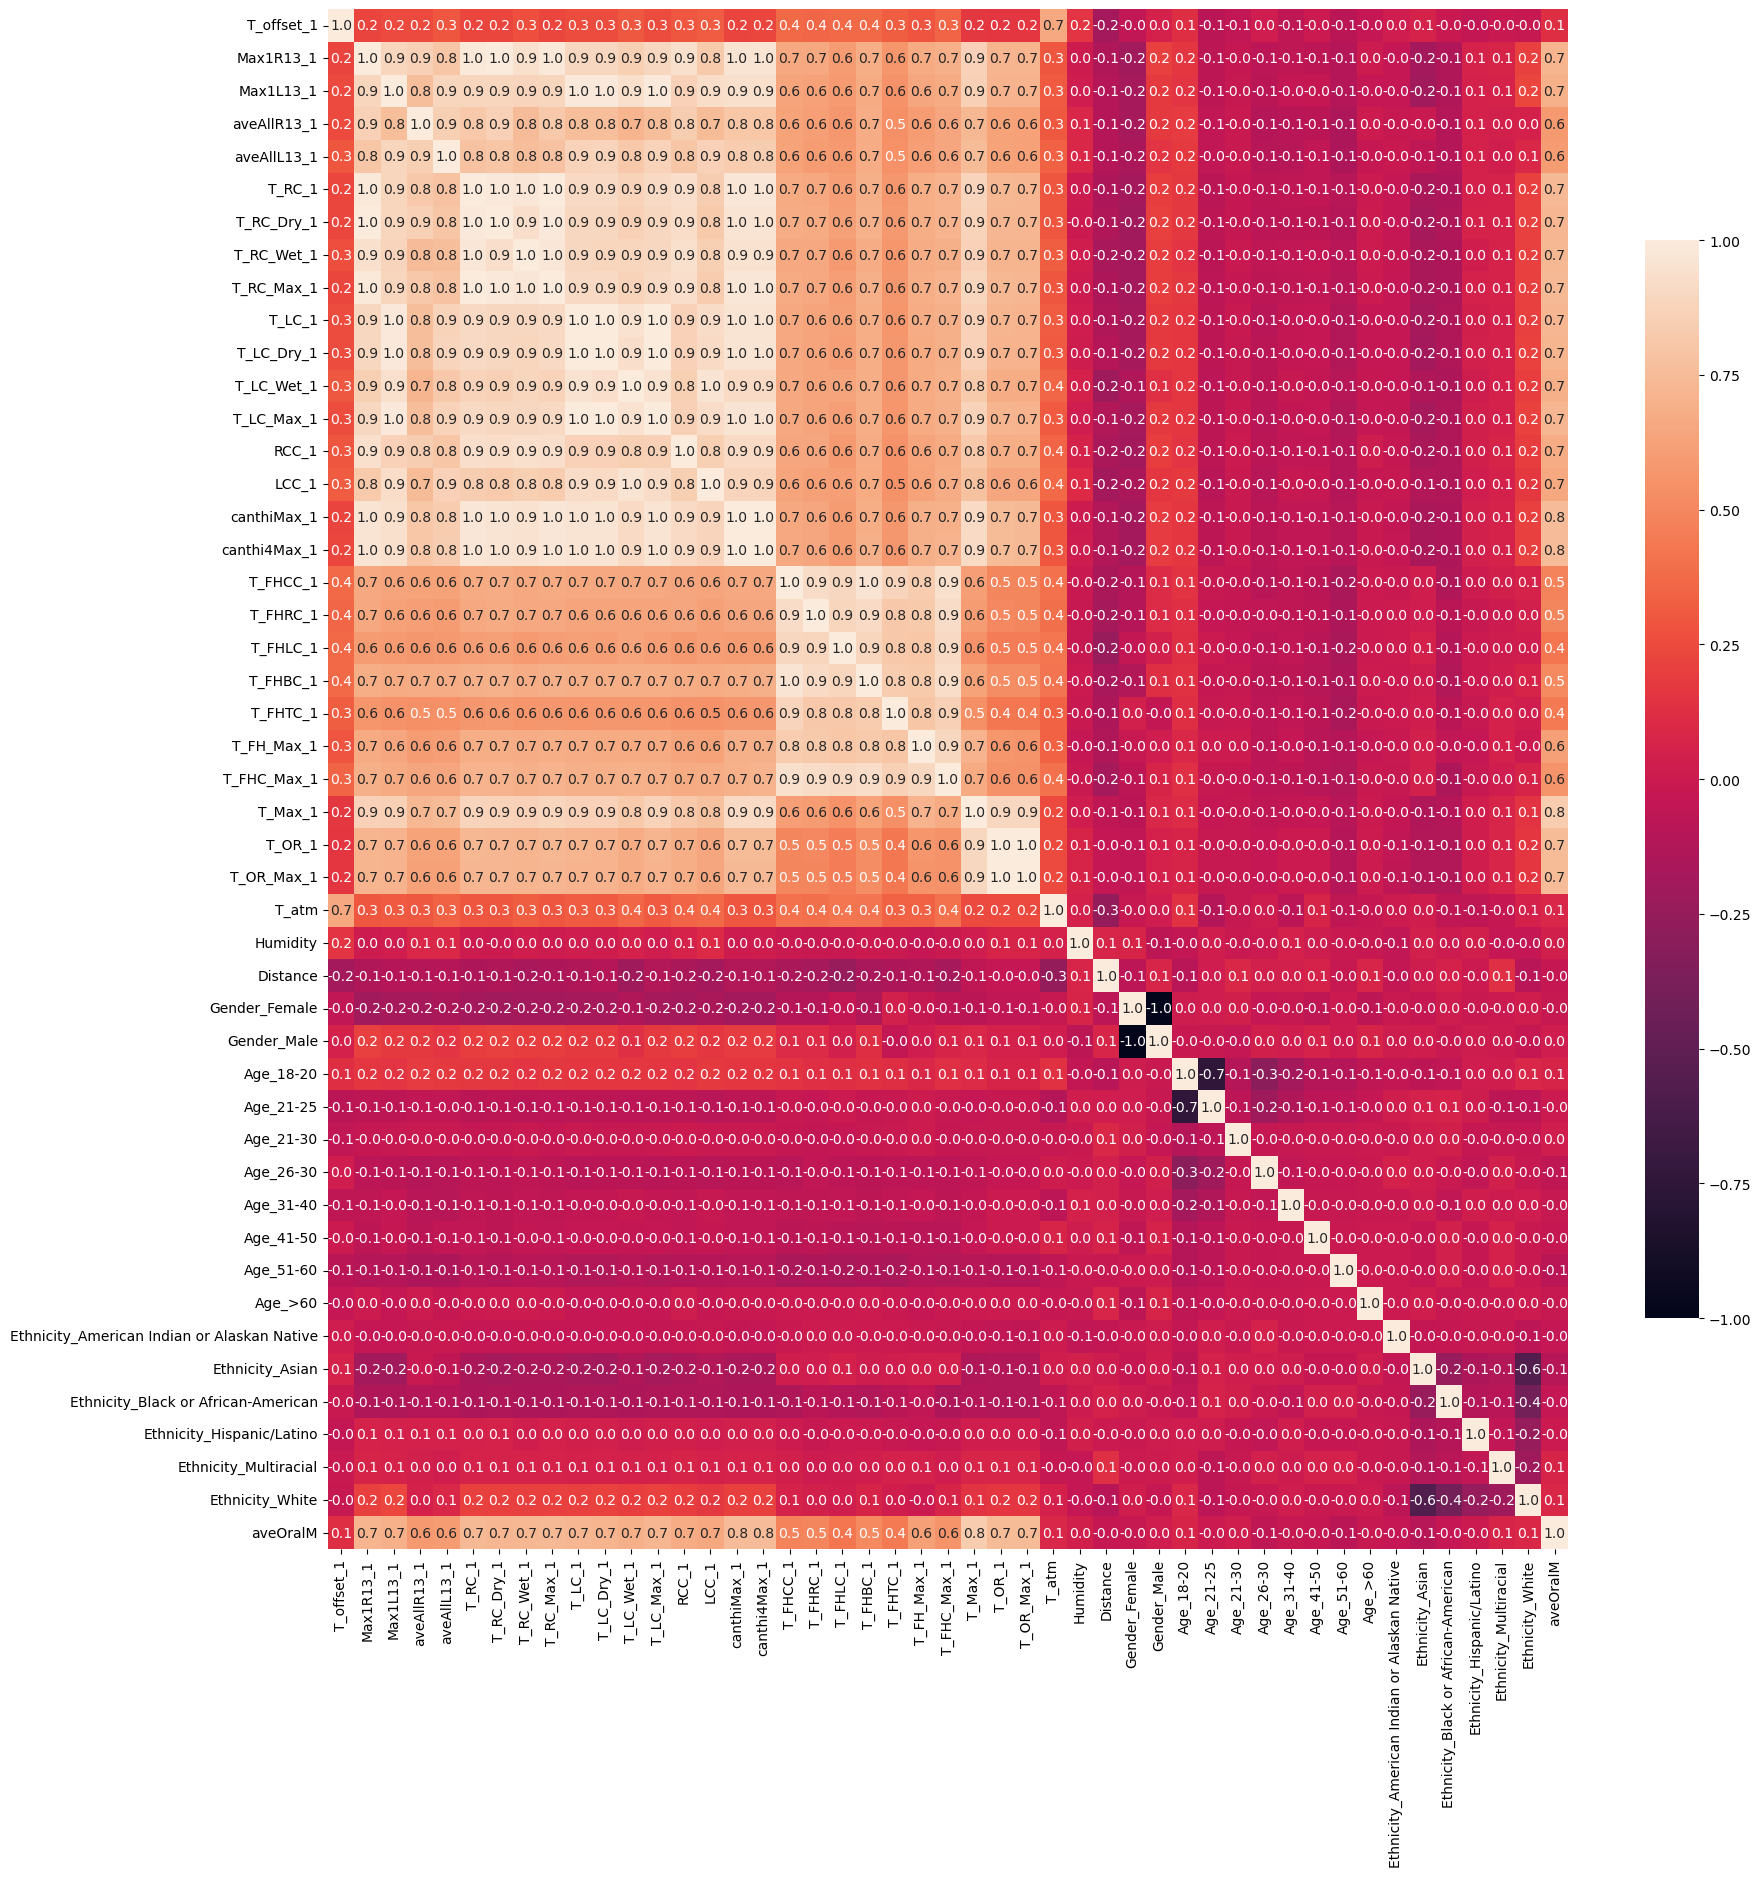

In [13]:
# Correlation Matrix
plt.figure(figsize=(20, 20))
corrMatrix = preprocessed_dataset.corr()
sns.heatmap(corrMatrix, annot=True, fmt=".1f", cbar_kws={"shrink": 0.7})

#### Target Variable Distribution

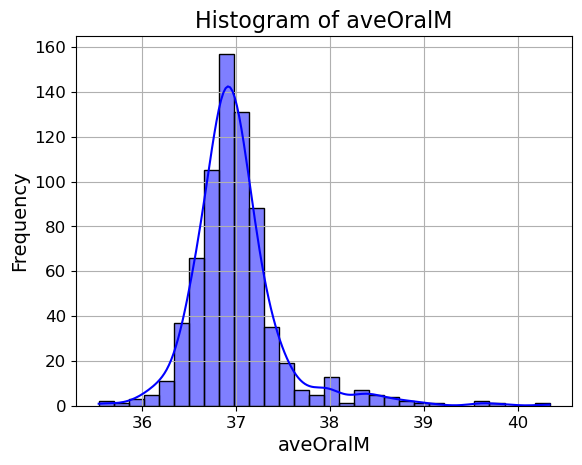

In [14]:
sns.histplot(data=preprocessed_dataset['aveOralM'].sort_values(), color="blue", bins=30, kde=True)
plt.grid(True)
plt.title('Histogram of aveOralM', fontsize=16)
plt.ylabel('Frequency', fontsize=14)
plt.xlabel('aveOralM', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show();

#### Target Variable BoxPlot

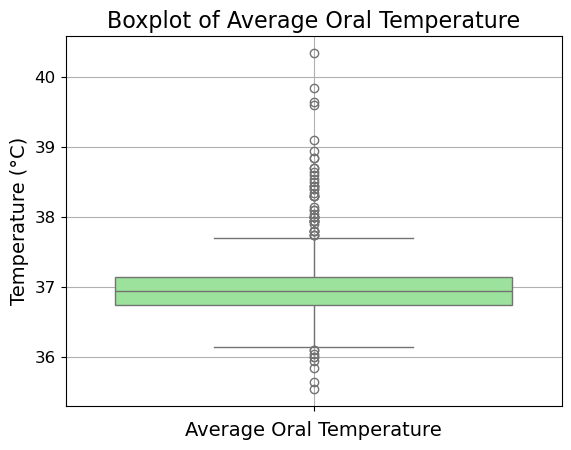

In [249]:
sns.boxplot(preprocessed_dataset['aveOralM'], color='lightgreen')
plt.xlabel('Average Oral Temperature', fontsize=14)
plt.ylabel('Temperature (°C)', fontsize=14)
plt.title('Boxplot of Average Oral Temperature', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid()
plt.show()

#### Numerical Features vs Target Variable

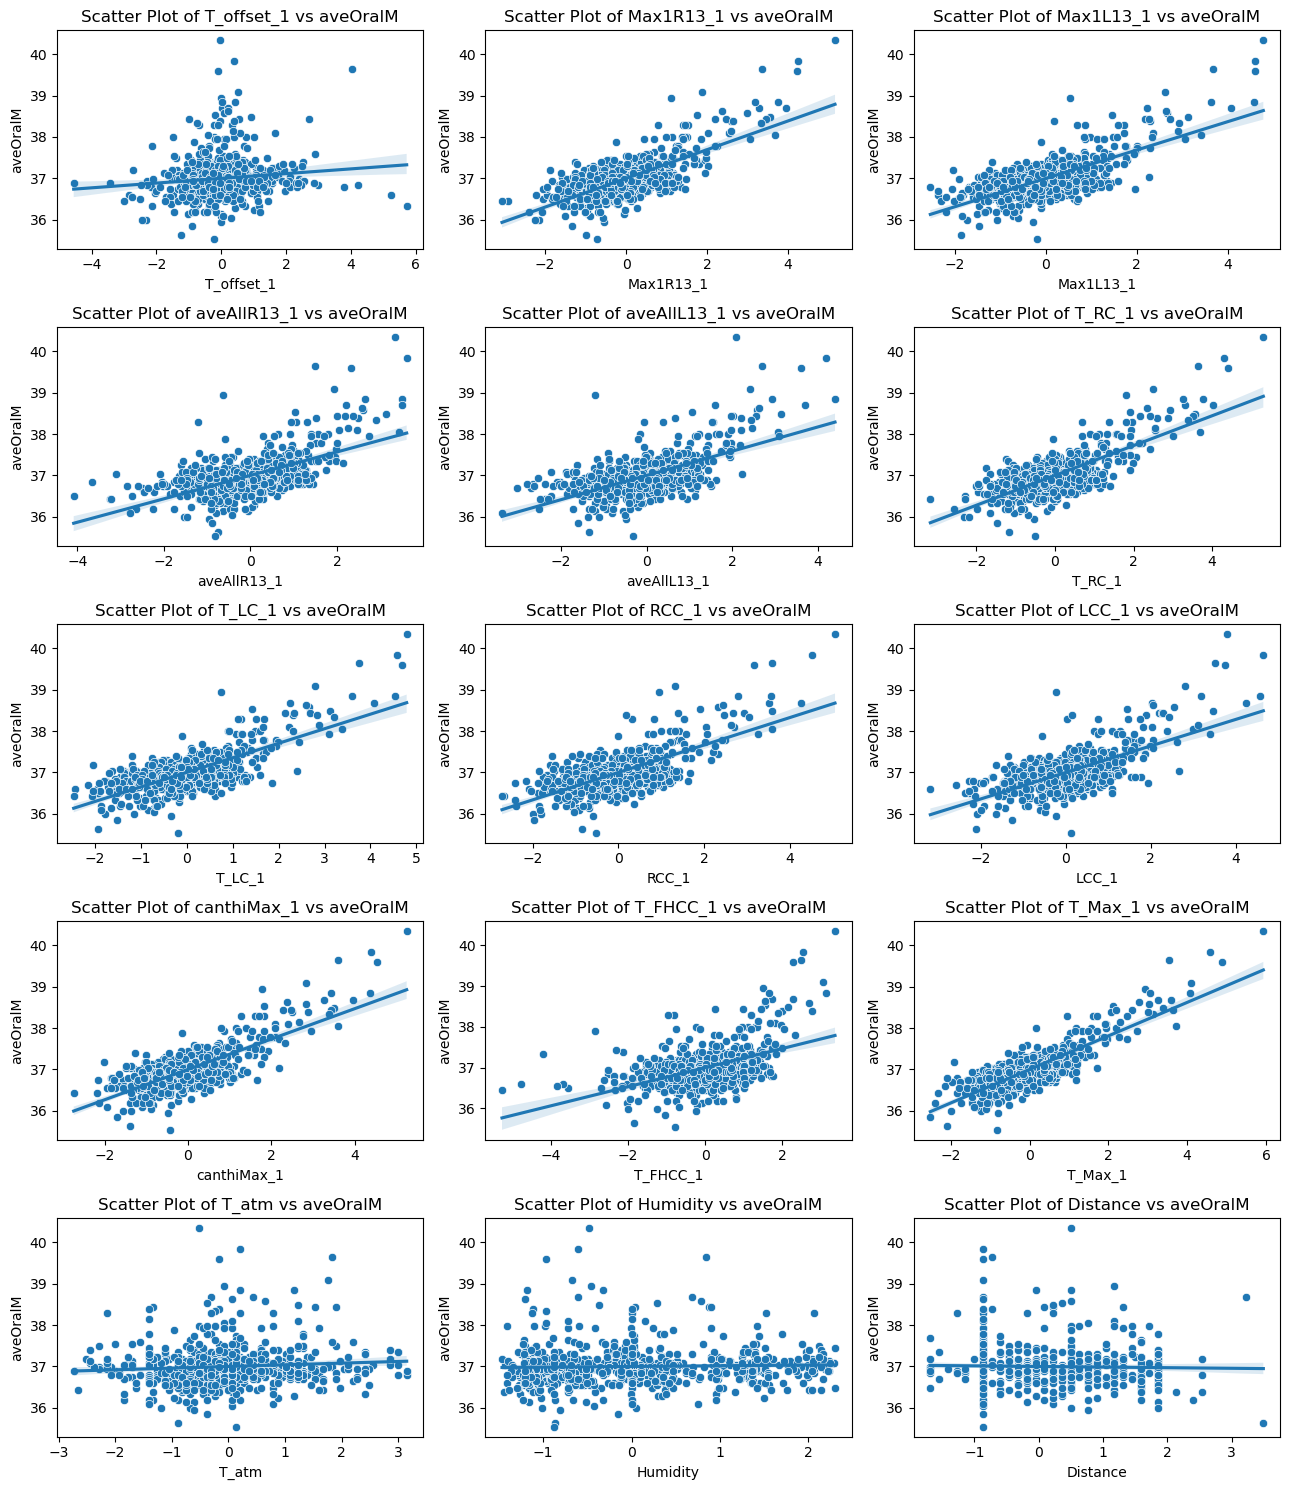

In [16]:
selected_features = ['T_offset_1', 'Max1R13_1', 'Max1L13_1', 'aveAllR13_1', 'aveAllL13_1',
                     'T_RC_1', 'T_LC_1', 'RCC_1', 'LCC_1', 'canthiMax_1', 'T_FHCC_1',
                     'T_Max_1', 'T_atm', 'Humidity', 'Distance']

num_rows = 5
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(13, 3*num_rows))
# Create individual scatter plots
for i, feature in enumerate(selected_features):
    row_index = i // num_cols
    col_index = i % num_cols
    sns.scatterplot(x=preprocessed_dataset[feature], y=preprocessed_dataset['aveOralM'], ax=axes[row_index, col_index])
    sns.regplot(x=preprocessed_dataset[feature], y=preprocessed_dataset['aveOralM'], ax=axes[row_index, col_index], scatter=False)
    axes[row_index, col_index].set_xlabel(feature)
    axes[row_index, col_index].set_ylabel('aveOralM')
    axes[row_index, col_index].set_title(f'Scatter Plot of {feature} vs aveOralM')

# Adjust layout
plt.tight_layout()
plt.show()


#### Frequency of Occurance of Categorical Features

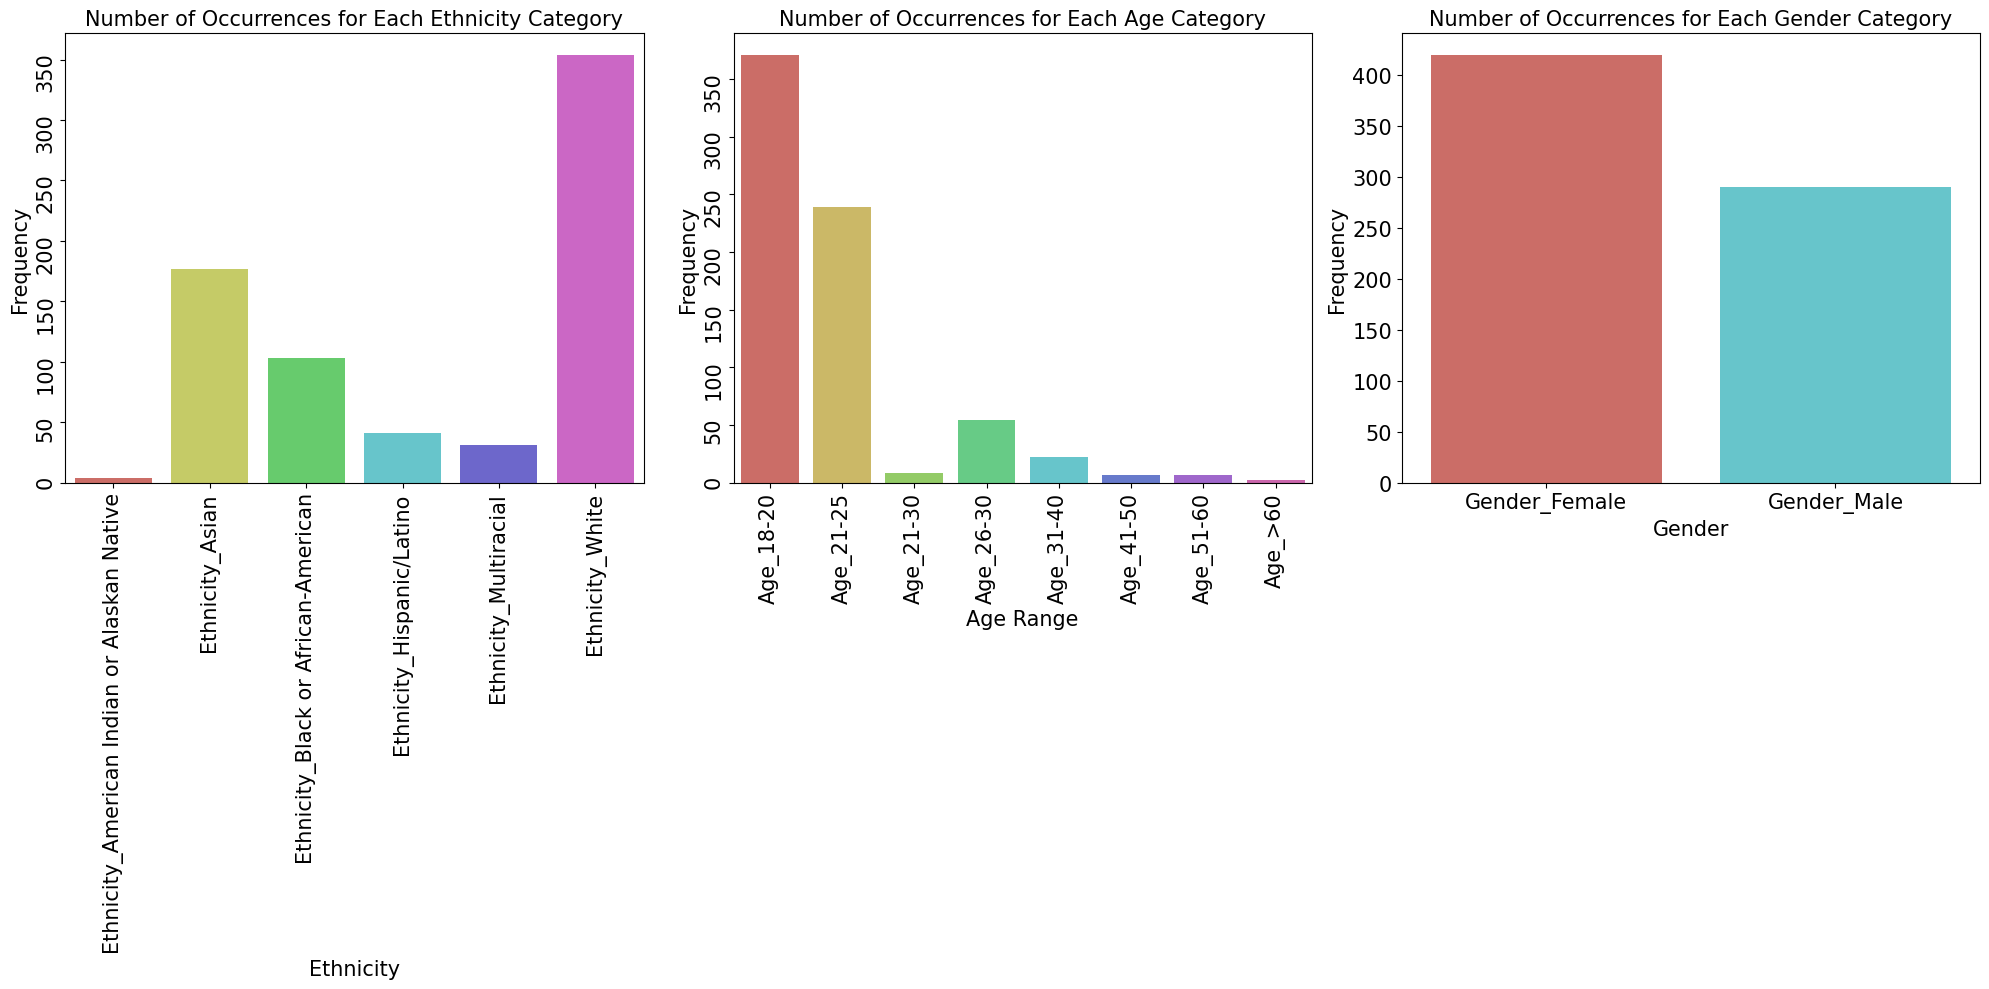

In [17]:
ethnicity_counts = preprocessed_dataset[['Ethnicity_American Indian or Alaskan Native', 
                                         'Ethnicity_Asian',
                                         'Ethnicity_Black or African-American', 
                                         'Ethnicity_Hispanic/Latino',
                                         'Ethnicity_Multiracial', 
                                         'Ethnicity_White']].sum()

age_counts = preprocessed_dataset[['Age_18-20', 'Age_21-25', 'Age_21-30',
                                    'Age_26-30', 'Age_31-40', 'Age_41-50', 
                                    'Age_51-60', 'Age_>60']].sum()

gender_counts = preprocessed_dataset[['Gender_Female', 'Gender_Male']].sum()

fig, axes = plt.subplots(1, 3, figsize=(20, 10))

# Plot ethnicity counts
sns.barplot(x=ethnicity_counts.index, y=ethnicity_counts.values, ax=axes[0], hue=ethnicity_counts.index, palette="hls")
axes[0].set_xlabel('Ethnicity', fontsize=15)
axes[0].set_ylabel('Frequency', fontsize=15)
axes[0].set_title('Number of Occurrences for Each Ethnicity Category', fontsize=15)
axes[0].tick_params(rotation=90, labelsize=15)
axes[0].tick_params(axis='y', labelsize=15)

# Plot age counts
sns.barplot(x=age_counts.index, y=age_counts.values, ax=axes[1], hue=age_counts.index, palette="hls")
axes[1].set_xlabel('Age Range', fontsize=15)
axes[1].set_ylabel('Frequency', fontsize=15)
axes[1].set_title('Number of Occurrences for Each Age Category', fontsize=15)
axes[1].tick_params(rotation=90, labelsize=15)
axes[0].tick_params(axis='y', labelsize=15)

# Plot gender counts
sns.barplot(x=gender_counts.index, y=gender_counts.values, ax=axes[2], hue=gender_counts.index, palette="hls")
axes[2].set_xlabel('Gender', fontsize=15)
axes[2].set_ylabel('Frequency', fontsize=15)
axes[2].set_title('Number of Occurrences for Each Gender Category', fontsize=15)
axes[2].tick_params(axis='x', labelsize=15)
axes[2].tick_params(axis='y', labelsize=15)


plt.tight_layout()
plt.show();

### Baseline model on entire raw dataset (standardised and one hot encoded)

In [49]:
#split data into test and validation sets
X_training_data = preprocessed_dataset.iloc[:, :-1]  # Features
y_training_data = preprocessed_dataset.iloc[:, -1]   # Labels

x_train, x_val, y_train, y_val = train_test_split(X_training_data, y_training_data, test_size=0.2, random_state=42)

print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)


(568, 46)
(142, 46)
(568,)
(142,)


In [50]:
#Linear Regression function
def LinReg(train_data, train_label, val_data, val_label):
    '''
    Function trains the model based off training data and returns prediction labels
    '''
    model = LinearRegression()
    model.fit(train_data, train_label)
    prediction_label = model.predict(val_data)

    return prediction_label

In [51]:
#Compute mse, root mse, mae, accuracy given validation label and prediction labels from model
def compute_metrics(val_label, prediction_label):

    mse = mean_squared_error(val_label, prediction_label)
    r_mse = np.sqrt(mse)
    mae = mean_absolute_error(val_label, prediction_label)
        
    return mse, r_mse, mae

In [52]:
model_test_prediction_raw = LinReg(x_train, y_train, x_val, y_val) # train linear regression model

mse_raw, r_mse_raw, mae_raw = compute_metrics(y_val, model_test_prediction_raw) # calculate metrics

print("Mean Squared Error for all features: ", mse_raw)
print("Root Mean Squared Error for all features: ", r_mse_raw)
print("Mean Absolute Error for all features: ", mae_raw)

Mean Squared Error for all features:  0.06689753989312426
Root Mean Squared Error for all features:  0.2586455874224887
Mean Absolute Error for all features:  0.2085629688302917


### We attempted 2 feature engineering and reduction techniques: We found better results using path: 2

### Path 1: Polynomial Feature Mapping and PCA
Path 1 has been commented out to save time when running the notebook as we are not using any of the engineered or reduced features from here

#### 2nd Order Polynomial Feature Mapping

In [22]:
# poly_map = PolynomialFeatures(degree=2, include_bias=True)

# #perform polynomial feature expansion
# #this data is expanded WITHOUT one hot encoded features and labels

# data_expanded = poly_map.fit_transform(features_plus_extra)
# data_expanded_df = pd.DataFrame(data_expanded)
# print(data_expanded_df.shape)

# data_expanded_df

#### PCA on Polynomial Mapped Features (without one-hot encoded features)

In [23]:
# # Create Scree Plot to determine how many features to include

# num_components = np.arange(1, 21)
# pca = PCA(n_components=20)  
# # pca.fit(data_expanded_df_nolabel)

# pda_data = pca.fit(data_expanded_df) 

# plt.figure(figsize=(10, 5))  
# explained_variance_ratio = pca.explained_variance_ratio_
# # cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# plt.plot(num_components, explained_variance_ratio[:39], linestyle='-')  
# plt.title('Scree Plot of Mapped Features')
# plt.xlabel('Number of Components')
# plt.ylabel('Explained Variance Ratio')
# plt.xticks(num_components)
# plt.grid(True)
# plt.show() 

#### Choosing best principle components

In [24]:
# # From Scree Plot above, we will use the top 30 features for our data
# pca_mapped_data = PCA(n_components=20)
# pca_transform_mapped = pca_mapped_data.fit_transform(data_expanded_df)

# print(pca_transform_mapped.shape)
# pca_transform_mapped_df = pd.DataFrame(pca_transform_mapped)


In [25]:
# # add back labels to final dataset

# # pca_data_add_extra = pd.concat([pca_transform_mapped_df, extra_features_copy], axis = 1)

# final_dataset = pd.concat([pca_transform_mapped_df, target], axis=1)

# # final_dataset = pd.concat([pca_transform_mapped_df, target], axis=1)
# print(final_dataset.shape)
# final_dataset

#### Baseline model on PCA reduced feature mapped data
Results after PCA performed much worse on the baseline

In [26]:
# x_train_pp = final_dataset.iloc[:, :-1]  # Features
# y_train_pp = final_dataset.iloc[:, -1]   # Labels

# x_train_poly_pca, x_val_poly_pca, y_train_poly_pca, y_val_poly_pca = train_test_split(x_train_pp, y_train_pp, test_size=0.2, random_state=42)

# print(x_train_poly_pca.shape)
# print(x_val_poly_pca.shape)
# print(y_train_poly_pca.shape)
# print(y_val.shape)

In [27]:
# Convert feature names to strings for x_train_poly_pca and x_val_poly_pca ###### TO REMOVE
# x_train_poly_pca.columns = x_train_poly_pca.columns.astype(str)
# x_val_poly_pca.columns = x_val_poly_pca.columns.astype(str)

# # Now train the Linear Regression model
# model_test_prediction_pp = LinReg(x_train_poly_pca, y_train_poly_pca, x_val_poly_pca, y_val) # train linear regression model

# mse_pp, r_mse_pp, mae_pp = compute_metrics(y_val, model_test_prediction_pp) # calculate metrics

# print("Mean Squared Error for all features: ", mse_pp)
# print("Root Mean Squared Error for all features: ", r_mse_pp)
# print("Mean Absolute Error for all features: ", mae_pp)

### Path 2: Feature Reduction Selection and PCA

#### Sequential feature selection

In [53]:
#Feature Reduction using Sequential Forward Feature Selection
def seq_feat_select(model_reduce, n_features_to_select, direction):

    # Create a SequentialFeatureSelector object for backward selection
    sfs = SequentialFeatureSelector(estimator=model_reduce, n_features_to_select=n_features_to_select, direction=direction)
    sfs.fit(x_train, y_train)

    # Get the names of selected features
    selected_features = x_train.columns[sfs.support_]
    
    return selected_features 

##### Sequential Feature Selection with linear regression

In [98]:
# perform sequential feature selection for various number of features and validate the metrics each epoch
num_feats = x_train.shape[1]
feature_select_mse_lin = []

for i in range(1, num_feats):
    # print(f"Number of features: {i}")
    selected_features_forward = seq_feat_select(LinearRegression(), i, 'forward')

    #extract features from x_train and x_val
    x_train_select_features = x_train[selected_features_forward].copy()
    x_val_select_features = x_val[selected_features_forward].copy()

    model_test_predict_select_features = LinReg(x_train_select_features, y_train, x_val_select_features, y_val)
    mse_sf, r_mse_sf, mae_sf = compute_metrics(y_val, model_test_predict_select_features)

    feature_select_mse_lin.append(mse_sf)

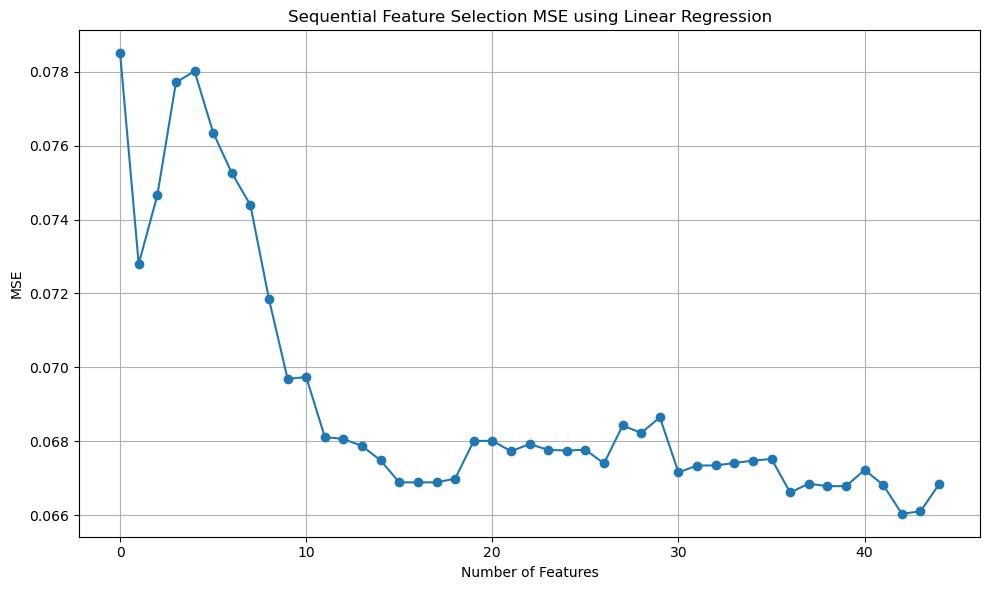

In [99]:
plt.figure(figsize=(10, 6))
plt.plot(feature_select_mse_lin, marker='o', linestyle='-')
plt.title('Sequential Feature Selection MSE using Linear Regression')
plt.xlabel('Number of Features')
plt.ylabel('MSE')
plt.grid(True)
plt.tight_layout()
plt.show()
# From plot we can see that we should take the top >15 features

In [54]:
# get features from best feature reduction: 15 features
sequential_selected_features = seq_feat_select(LinearRegression(), 15, 'forward')

#extract features from x_train and x_val
x_train_select_features = X_training_data[sequential_selected_features].copy()

##### Sequential feature selection with Nearest Neighbours

In [24]:
# perform sequential feature selection for various number of features and validate the metrics each epoch
num_feats = preprocessed_dataset.shape[1]-15
feature_select_mse_nn = []

for i in range(1, num_feats):
    # print(f"Number of features: {i}")
    selected_features_forward = seq_feat_select(KNeighborsRegressor(n_neighbors = 8), i, 'forward')

    #extract features from x_train and x_val
    x_train_select_features = x_train[selected_features_forward].copy()
    x_val_select_features = x_val[selected_features_forward].copy()

    model_test_predict_select_features = LinReg(x_train_select_features, y_train, x_val_select_features, y_val)
    mse_sf, r_mse_sf, mae_sf = compute_metrics(y_val, model_test_predict_select_features)

    feature_select_mse_nn.append(mse_sf)

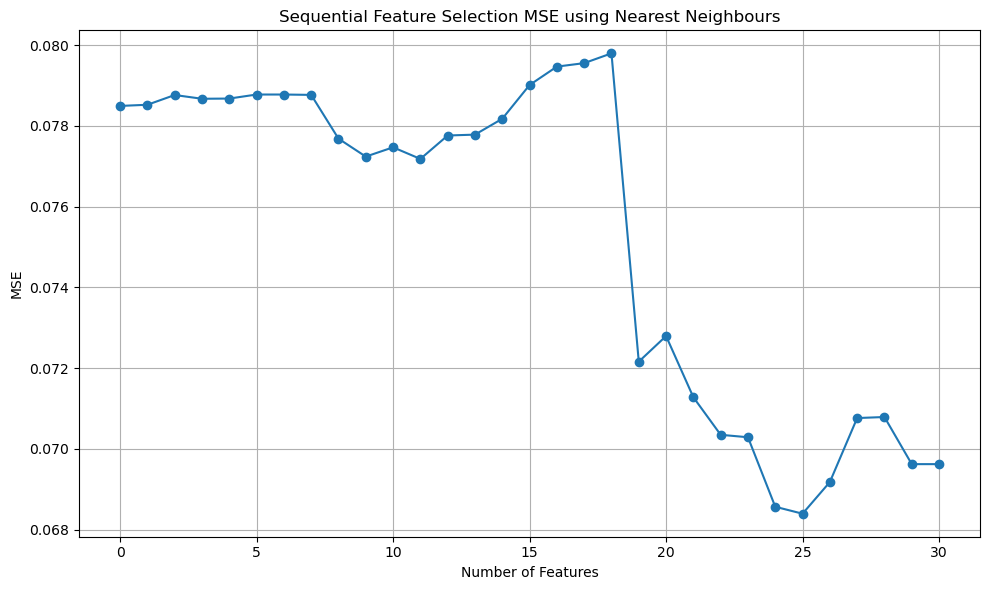

In [102]:
plt.figure(figsize=(10, 6))
plt.plot(feature_select_mse_nn, marker='o', linestyle='-')
plt.title('Sequential Feature Selection MSE using Nearest Neighbours')
plt.xlabel('Number of Features')
plt.ylabel('MSE')
plt.grid(True)
plt.tight_layout()
plt.show()
# From plot we can see that we should take the top 25 features

In [25]:
# get features from best feature reduction: 15 features
sequential_selected_features_knn = seq_feat_select(KNeighborsRegressor(n_neighbors = 8), 25, 'forward')

#extract features from x_train and x_val
x_train_select_features_knn = X_training_data[sequential_selected_features_knn].copy()

#### Univariate Feature Selection

In [26]:
def univ_feat_select(n_features_to_select):
    # Create a SelectKBest object for univariate feature selection
    selector = SelectKBest(score_func=f_regression, k=n_features_to_select)
    
    # Fit the selector to the training data
    selector.fit(x_train, y_train)
    
    # Get the names of selected features
    selected_features = x_train.columns[selector.get_support()]
    
    return selected_features 

In [113]:
num_feats = preprocessed_dataset.shape[1]
feature_select_mse_univ_lin = []

for i in range(1, num_feats):
    # Create a SelectKBest object for univariate feature selection
    selector = SelectKBest(score_func=f_regression, k=i)
    
    selector.fit(x_train, y_train)
    selected_features = x_train.columns[selector.get_support()]
    
    # Extract selected features from x_train and x_val
    x_train_select_features = x_train[selected_features].copy()
    x_val_select_features = x_val[selected_features].copy()
    
    # Train linear regression model
    model_test_predict_select_features = LinReg(x_train_select_features, y_train, x_val_select_features, y_val)
    mse_usf, r_mse_usf, mae_usf = compute_metrics(y_val, model_test_predict_select_features)

    feature_select_mse_univ_lin.append(mse_usf)

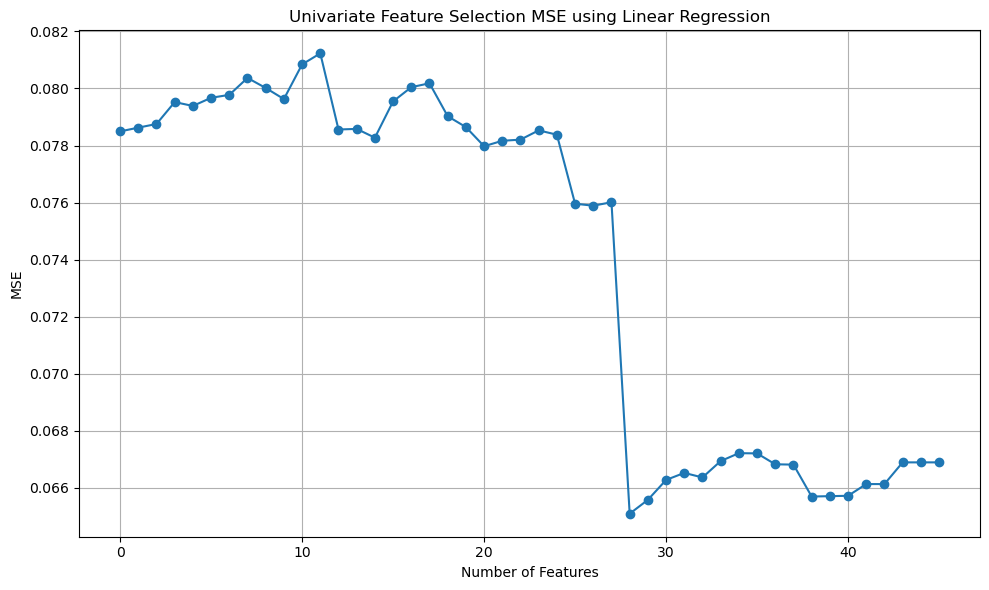

In [114]:
plt.figure(figsize=(10, 6))
plt.plot(feature_select_mse_univ_lin, marker='o', linestyle='-')
plt.title('Univariate Feature Selection MSE using Linear Regression')
plt.xlabel('Number of Features')
plt.ylabel('MSE')
plt.grid(True)
plt.tight_layout()
plt.show()
# From plot we can see that we should take the top 28 features

In [27]:
selector = SelectKBest(score_func=f_regression, k=29)
    
selector.fit(x_train, y_train)
selected_features = x_train.columns[selector.get_support()]

# Extract selected features from x_train and x_val
x_train_select_features_univ = X_training_data[selected_features].copy()

#### The final feature engineered dataset + labels (Linear Regression)

In [55]:
full_dataset_sfs_reduced = pd.concat([x_train_select_features,y_training_data], axis=1)
full_dataset_sfs_reduced_df = pd.DataFrame(full_dataset_sfs_reduced)
print(f"Final feature reduced dataset shape: {full_dataset_sfs_reduced_df.shape}")
full_dataset_sfs_reduced_df

Final feature reduced dataset shape: (710, 16)


,T_offset_1,Max1R13_1,T_RC_Dry_1,T_RC_Wet_1,LCC_1,T_FHCC_1,T_FHRC_1,T_FHLC_1,T_FHBC_1,T_FH_Max_1,T_Max_1,T_atm,Gender_Female,Ethnicity_Hispanic/Latino,Ethnicity_White,aveOralM
0,-0.721540,-0.990720,-1.064954,-1.395203,-1.237300,-1.432016,-1.575199,-1.732829,-1.455076,-1.662317,-0.791048,0.062470,0,0,1,36.59
1,-0.491898,-1.885449,-1.727292,-1.628103,-1.643680,-0.740919,-0.694440,-1.265877,-0.714249,-1.360446,-1.908290,0.062470,1,0,0,37.19
2,-0.247441,0.169632,0.217444,0.225591,-0.103950,0.576722,0.483718,0.219186,0.604501,-0.049040,-0.316086,0.062470,1,0,1,37.34
3,-0.047431,-0.631896,-0.660975,-0.720268,0.036025,-0.121969,-0.133957,0.230669,-0.198385,0.460677,-0.731678,0.062470,1,0,0,37.09
4,-0.151140,-0.030750,-0.144258,0.140036,-0.054282,0.865312,0.990822,-0.163562,0.371781,0.094473,-0.353867,0.062470,0,0,1,37.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705,-0.040023,-0.151912,0.024850,-0.686997,-0.036220,0.223579,0.399836,0.479455,0.336873,-0.425141,-0.164961,0.356691,1,0,1,36.89
706,-0.269665,0.174292,0.090614,-0.021568,0.013448,0.546344,0.510408,0.460318,0.856615,0.460677,0.660826,0.356691,1,0,0,37.14
707,0.071094,2.182772,2.185667,2.174347,1.765398,0.360279,0.090999,0.441180,0.383417,1.658263,1.886013,-1.408633,0,0,0,37.79
708,0.374813,2.578876,2.570856,2.516567,3.119999,1.362750,1.654251,0.946408,1.539262,1.633519,2.307002,-1.408633,0,0,1,38.14


#### The final feature engineered dataset + labels (KNN)

In [29]:
full_dataset_sfs_reduced_KNN = pd.concat([x_train_select_features_knn,y_training_data], axis=1)
full_dataset_sfs_reduced_KNN_df = pd.DataFrame(full_dataset_sfs_reduced_KNN)
print(f"Final feature reduced dataset shape: {full_dataset_sfs_reduced_KNN_df.shape}")
full_dataset_sfs_reduced_KNN_df

Final feature reduced dataset shape: (710, 26)


,Max1L13_1,aveAllR13_1,aveAllL13_1,T_RC_1,LCC_1,T_FHCC_1,T_FHRC_1,T_FHLC_1,T_FH_Max_1,T_FHC_Max_1,...,Age_26-30,Age_31-40,Age_41-50,Age_51-60,Age_>60,Ethnicity_American Indian or Alaskan Native,Ethnicity_Black or African-American,Ethnicity_Hispanic/Latino,Ethnicity_Multiracial,aveOralM
0,-0.371420,-0.685640,-0.095595,-1.230225,-1.237300,-1.432016,-1.575199,-1.732829,-1.662317,-1.815942,...,0,0,1,0,0,0,0,0,0,36.59
1,-2.037936,-1.380633,-1.224645,-1.764973,-1.643680,-0.740919,-0.694440,-1.265877,-1.360446,-0.660159,...,0,1,0,0,0,0,1,0,0,37.19
2,-0.099335,-0.866782,-0.287167,0.130950,-0.103950,0.576722,0.483718,0.219186,-0.049040,0.336205,...,0,0,0,0,0,0,0,0,0,37.34
3,0.085293,-0.707821,0.442436,-0.797566,0.036025,-0.121969,-0.133957,0.230669,0.460677,0.500052,...,0,0,0,0,0,0,1,0,0,37.09
4,0.187325,0.068501,0.638084,-0.029474,-0.054282,0.865312,0.990822,-0.163562,0.094473,0.601903,...,0,0,0,0,0,0,0,0,0,37.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705,-0.075042,0.053714,0.022609,-0.102394,-0.036220,0.223579,0.399836,0.479455,-0.425141,0.150217,...,0,0,0,0,0,0,0,0,0,36.89
706,-0.070183,0.486236,0.377220,-0.010029,0.013448,0.546344,0.510408,0.460318,0.460677,0.274209,...,0,0,0,0,0,0,0,0,0,37.14
707,1.732375,2.009306,1.856805,2.138685,1.765398,0.360279,0.090999,0.441180,1.658263,0.473482,...,0,0,0,0,0,0,0,0,1,37.79
708,2.913027,2.245899,2.455976,2.542176,3.119999,1.362750,1.654251,0.946408,1.633519,1.390138,...,0,0,0,0,0,0,0,0,0,38.14


In [30]:
full_dataset_ufs_reduced = pd.concat([x_train_select_features_univ,y_training_data], axis=1)
full_dataset_ufs_reduced_univ_df = pd.DataFrame(full_dataset_ufs_reduced)
print(f"Final feature reduced dataset shape: {full_dataset_ufs_reduced_univ_df.shape}")
full_dataset_ufs_reduced_univ_df

Final feature reduced dataset shape: (710, 30)


,T_offset_1,Max1R13_1,Max1L13_1,aveAllR13_1,aveAllL13_1,T_RC_1,T_RC_Dry_1,T_RC_Wet_1,T_RC_Max_1,T_LC_1,...,T_FHBC_1,T_FHTC_1,T_FH_Max_1,T_FHC_Max_1,T_Max_1,T_OR_1,T_OR_Max_1,T_atm,Age_51-60,aveOralM
0,-0.721540,-0.990720,-0.371420,-0.685640,-0.095595,-1.230225,-1.064954,-1.395203,-1.196208,-0.508548,...,-1.455076,-2.134077,-1.662317,-1.815942,-0.791048,-0.286742,-0.316433,0.062470,0,36.59
1,-0.491898,-1.885449,-2.037936,-1.380633,-1.224645,-1.764973,-1.727292,-1.628103,-1.760348,-2.045221,...,-0.714249,-0.731523,-1.360446,-0.660159,-1.908290,-1.321512,-1.355600,0.062470,0,37.19
2,-0.247441,0.169632,-0.099335,-0.866782,-0.287167,0.130950,0.217444,0.225591,0.136329,-0.182437,...,0.604501,0.204682,-0.049040,0.336205,-0.316086,0.142426,0.126881,0.062470,0,37.34
3,-0.047431,-0.631896,0.085293,-0.707821,0.442436,-0.797566,-0.660975,-0.720268,-0.821736,0.000382,...,-0.198385,0.551814,0.460677,0.500052,-0.731678,-1.564707,-1.593942,0.062470,0,37.09
4,-0.151140,-0.030750,0.187325,0.068501,0.638084,-0.029474,-0.144258,0.140036,-0.014433,0.089322,...,0.371781,-0.976970,0.094473,0.601903,-0.353867,-0.377344,-0.383169,0.062470,0,37.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705,-0.040023,-0.151912,-0.075042,0.053714,0.022609,-0.102394,0.024850,-0.686997,-0.033886,-0.123144,...,0.336873,0.190656,-0.425141,0.150217,-0.164961,-0.048315,-0.016123,0.356691,0,36.89
706,-0.269665,0.174292,-0.070183,0.486236,0.377220,-0.010029,0.090614,-0.021568,0.014747,-0.133026,...,0.856615,0.537789,0.460677,0.274209,0.660826,0.738492,0.717967,0.356691,0,37.14
707,0.071094,2.182772,1.732375,2.009306,1.856805,2.138685,2.185667,2.174347,2.115681,1.660583,...,0.383417,0.611423,1.658263,0.473482,1.886013,1.902012,1.933507,-1.408633,0,37.79
708,0.374813,2.578876,2.913027,2.245899,2.455976,2.542176,2.570856,2.516567,2.529060,2.876086,...,1.539262,1.288155,1.633519,1.390138,2.307002,1.797105,1.761901,-1.408633,0,38.14


#### PCA was attempted after sequential feature reduction but performed worse so we will leave it commented out

In [31]:
# # PCA on entire dataset with reduced features

# num_components = np.arange(1, 44)
# pca = PCA(n_components=43)  
# pca.fit(full_dataset_reduced)

# plt.figure(figsize=(10, 5))  
# explained_variance_ratio = pca.explained_variance_ratio_
# # cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# plt.plot(num_components, explained_variance_ratio[:43], marker='o', linestyle='-')  
# plt.title('Scree Plot')
# plt.xlabel('Number of Components')
# plt.ylabel('Explained Variance Ratio')
# plt.xticks(num_components)
# plt.grid(True)
# plt.show() 

In [32]:
# num_components = 13
# pca_dataset_reduced = PCA(n_components=num_components)
# pca_transform = pca_dataset_reduced.fit_transform(norm_full_dataset_reduced)

### Train Test Split

In [56]:
# Reduced dataset based off linear regression
x_train_final = full_dataset_sfs_reduced_df.iloc[:, :-1]  # Features
y_train_final = full_dataset_sfs_reduced_df.iloc[:, -1]   # Labels

# Reduced dataset based off KNN
x_train_final_KNN = full_dataset_sfs_reduced_KNN_df.iloc[:, :-1]  # Features
y_train_final_KNN = full_dataset_sfs_reduced_KNN_df.iloc[:, -1]   # Labels

# Reduced dataset based off Univariate feature selection Linear Regression
x_train_final_Univ = full_dataset_ufs_reduced_univ_df.iloc[:, :-1]  # Features
y_train_final_Univ = full_dataset_ufs_reduced_univ_df.iloc[:, -1]   # Labels

x_train, x_val, y_train, y_val = train_test_split(x_train_final, y_train_final, test_size=0.2, random_state=42)
x_train_univ, x_val_univ, y_train_univ, y_val_univ = train_test_split(x_train_final_Univ, y_train_final_Univ, test_size=0.2, random_state=42)

print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

(568, 15)
(142, 15)
(568,)
(142,)


### Model Selection

#### Trivial Solution
Mean output value

In [57]:
# A system that always outputs the mean output value y_pred from the training set. 
y_pred = y_train.mean()
y_pred_triv = np.array([y_pred]*len(y_val))
mse, r_mse, mae = compute_metrics(y_val, y_pred_triv)

print("Label means: ", y_pred)
print("Mean Squared Error for all features: ", mse)
print("Root Mean Squared Error for all features: ", r_mse)
print("Mean Absolute Error for all features: ", mae)

Label means:  36.991496478873245
Mean Squared Error for all features:  0.2632768253446733
Root Mean Squared Error for all features:  0.5131050821660932
Mean Absolute Error for all features:  0.3266613767109709


#### K fold Cross Validation Function

In [58]:
#K fold validation for NN, Ridge Regression, Random Forest

def k_fold(data, labels, num_folds, model, model_parameters):
    kf = KFold(n_splits = num_folds, shuffle = True)

    mse = []
    rmse = []
    mae = []

    #from k-fold, split data into training and validation
    for train_index, test_index in kf.split(data):
        x_train, x_val = data.iloc[train_index].values, data.iloc[test_index].values
        y_train, y_val = labels.iloc[train_index].values.ravel(), labels.iloc[test_index].values.ravel()

        model_predictions = model(x_train, y_train, x_val, y_val, model_parameters)

        model_mse, model_rmse, model_mae = compute_metrics(y_val, model_predictions)

        mse.append(model_mse)
        rmse.append(model_rmse)
        mae.append(model_mae)

    mean_mse = np.mean(mse)
    mean_rmse = np.mean(rmse)
    mean_mae = np.mean(mae)

    return mean_mse, mean_rmse, mean_mae

#### Baseline Models

##### Linear Regression (No Regularisation)

In [59]:
model_test_prediction = LinReg(x_train, y_train, x_val, y_val) # train linear regression model

mse_all, r_mse_all, mae_all = compute_metrics(y_val, model_test_prediction) # calculate metrics

print("Mean Squared Error for all features: ", mse_all)
print("Root Mean Squared Error for all features: ", r_mse_all)
print("Mean Absolute Error for all features: ", mae_all)

Mean Squared Error for all features:  0.06748466420821364
Root Mean Squared Error for all features:  0.25977810571372956
Mean Absolute Error for all features:  0.20809045740566023


##### 1NN (Nearest Neighbour)

In [60]:
def k_fold_nn(data, labels, num_folds, model, k_val, metric_eval):
    kf = KFold(n_splits = num_folds, shuffle = True)

    mse = []
    rmse = []
    mae = []

    #from k-fold, split data into training and validation
    for train_index, test_index in kf.split(data):
        x_train, x_val = data.iloc[train_index].values, data.iloc[test_index].values
        y_train, y_val = labels.iloc[train_index].values.ravel(), labels.iloc[test_index].values.ravel()

        model_predictions = model(x_train, y_train, x_val, y_val, k_val, metric_eval)

        model_mse, model_rmse, model_mae = compute_metrics(y_val, model_predictions)

        mse.append(model_mse)
        rmse.append(model_rmse)
        mae.append(model_mae)

    mean_mse = np.mean(mse)
    mean_rmse = np.mean(rmse)
    mean_mae = np.mean(mae)

    return mean_mse, mean_rmse, mean_mae

In [61]:
def Nearest_Neighbors(train_data, train_label, val_data, val_label, k_val, metric_eval):
    knn = KNeighborsRegressor(n_neighbors = k_val, metric = metric_eval)

    knn.fit(train_data, train_label)

    predictions = knn.predict(val_data)

    return predictions

nn_metrics = ['euclidean', 'manhattan', 'minkowski', 'hamming']

mse_oneNN_values = []
r_mse_oneNN_values = []
mae_oneNN_values = []


for i in nn_metrics:
    mse_oneNN, r_mse_oneNN, mae_oneNN = k_fold_nn(x_train_final_KNN, y_train_final_KNN, 5, Nearest_Neighbors, 1, i)

    mse_oneNN_values.append(mse_oneNN)
    r_mse_oneNN_values.append(r_mse_oneNN)
    mae_oneNN_values.append(mae_oneNN)

    print("Metric Used: ", i)
    print("")

    print("Mean Squared Error for all features: ", mse_oneNN)
    print("Root Mean Squared Error for all features: ", r_mse_oneNN)
    print("Mean Absolute Error for all features: ", mae_oneNN)
    print("")


best_mse_oneNN = min(mse_oneNN_values)
best_rmse_oneNN = min(r_mse_oneNN_values)
best_mae_oneNN = min(mae_oneNN_values)

print("Best MSE from 1-Nearest Neighbors: ", best_mse_oneNN)
print("Best RMSE from 1-Nearest Neighbors: ", best_rmse_oneNN)
print("Best MAE from 1-Nearest Neighbors: ", best_mae_oneNN)

Metric Used:  euclidean

Mean Squared Error for all features:  0.11790845070422531
Root Mean Squared Error for all features:  0.34147891301791544
Mean Absolute Error for all features:  0.2657746478873238

Metric Used:  manhattan

Mean Squared Error for all features:  0.1270915492957747
Root Mean Squared Error for all features:  0.3562612489968627
Mean Absolute Error for all features:  0.2714084507042254

Metric Used:  minkowski

Mean Squared Error for all features:  0.1195704225352113
Root Mean Squared Error for all features:  0.34542909635589114
Mean Absolute Error for all features:  0.26746478873239443

Metric Used:  hamming

Mean Squared Error for all features:  0.3985633802816901
Root Mean Squared Error for all features:  0.6285169960432277
Mean Absolute Error for all features:  0.4328169014084507

Best MSE from 1-Nearest Neighbors:  0.11790845070422531
Best RMSE from 1-Nearest Neighbors:  0.34147891301791544
Best MAE from 1-Nearest Neighbors:  0.2657746478873238


#### In-Class Regression Models

##### Lasso Regression (L1)

In [62]:
def lasso_regression(train_data, train_label, val_data, val_label, alpha_val):
    las_model = Lasso(alpha=alpha_val)
    las_model.fit(train_data, train_label)

    # Predicting on the test set
    las_pred = las_model.predict(val_data)

    return las_pred

alpha_values = [0.001, 0.005, 0.01, 0.1, 1, 5, 10]

mse_las_values = []
r_mse_las_values = []
mae_las_values = []

for i in alpha_values:
    mse_las, r_mse_las, mae_las = k_fold(x_train_final, y_train_final, 5, lasso_regression, i)

    mse_las_values.append(mse_las)
    r_mse_las_values.append(r_mse_las)
    mae_las_values.append(mae_las)

    print("Mean Squared Error for lambda =", i, ":", mse_las)
    print("Root Mean Squared Error for lambda =", i, ":", r_mse_las)
    print("Mean Absolute Error for lambda =", i, ":", mae_las)
    print("")

mse_las = min(mse_las_values)
r_mse_las = min(r_mse_las_values)
mae_las = min(mae_las_values)

print("Best MSE for Lasso Regression: ", mse_las)

Mean Squared Error for lambda = 0.001 : 0.06571591821168872
Root Mean Squared Error for lambda = 0.001 : 0.2559074516798242
Mean Absolute Error for lambda = 0.001 : 0.19745770595113105

Mean Squared Error for lambda = 0.005 : 0.06796708688818712
Root Mean Squared Error for lambda = 0.005 : 0.26064819837587583
Mean Absolute Error for lambda = 0.005 : 0.20054178068745182

Mean Squared Error for lambda = 0.01 : 0.06901190653395942
Root Mean Squared Error for lambda = 0.01 : 0.2623967987243413
Mean Absolute Error for lambda = 0.01 : 0.2018514762344601

Mean Squared Error for lambda = 0.1 : 0.08459784802736917
Root Mean Squared Error for lambda = 0.1 : 0.28990330982164403
Mean Absolute Error for lambda = 0.1 : 0.2130192935995158

Mean Squared Error for lambda = 1 : 0.23906596223467563
Root Mean Squared Error for lambda = 1 : 0.48691169030193693
Mean Absolute Error for lambda = 1 : 0.317205663558818

Mean Squared Error for lambda = 5 : 0.24012992523804777
Root Mean Squared Error for lambda =

##### Ridge Regression (L2)

In [63]:
def k_fold_rr(data, labels, num_folds, model, lambda_val, solver_method):
    kf = KFold(n_splits = num_folds, shuffle = True)

    mse = []
    rmse = []
    mae = []

    #from k-fold, split data into training and validation
    for train_index, test_index in kf.split(data):
        x_train, x_val = data.iloc[train_index].values, data.iloc[test_index].values
        y_train, y_val = labels.iloc[train_index].values.ravel(), labels.iloc[test_index].values.ravel()

        model_predictions = model(x_train, y_train, x_val, y_val, lambda_val, solver_method)

        model_mse, model_rmse, model_mae = compute_metrics(y_val, model_predictions)

        mse.append(model_mse)
        rmse.append(model_rmse)
        mae.append(model_mae)

    mean_mse = np.mean(mse)
    mean_rmse = np.mean(rmse)
    mean_mae = np.mean(mae)

    return mean_mse, mean_rmse, mean_mae

In [64]:
def ridge_regression(train_data, train_label, val_data, val_label, lambda_val, solver_method):
    rr_model = Ridge(alpha=lambda_val, solver = solver_method)
    rr_model.fit(train_data, train_label)

    # Predicting on the test set
    rr_pred = rr_model.predict(val_data)

    return rr_pred

lambda_values = [0.001, 0.005, 0.01, 0.1, 1, 5, 10]
solvers = ['auto', 'svd', 'cholesky', 'lsqr']

mse_results_rr = []
r_mse_results_rr = []
mae_results_rr = []

for j in solvers:

    mse_rr_values = []
    r_mse_rr_values = []
    mae_rr_values = []

    print("Solver: ", j)
    print("")

    for i in lambda_values:
        mse_rr, r_mse_rr, mae_rr = k_fold_rr(x_train_final, y_train_final, 5, ridge_regression, i, j)

        mse_rr_values.append(mse_rr)
        r_mse_rr_values.append(r_mse_rr)
        mae_rr_values.append(mae_rr)

        print("Lambda = ", i)

        print("Mean Squared Error: ", mse_rr)
        print("Mean Squared Error: ", r_mse_rr)
        print("Mean Squared Error: ", mae_rr)
    
    mse_results_rr.append(mse_rr_values)
    r_mse_results_rr.append(r_mse_rr_values)
    mae_results_rr.append(mae_rr_values)

mse_results_rr = np.array(mse_results_rr)
r_mse_results_rr = np.array(r_mse_results_rr)
mae_results_rr = np.array(mae_results_rr)

best_mse_rr = np.min(mse_results_rr)
best_rmse_rr = np.min(r_mse_results_rr)
best_mae_rr = np.min(mae_results_rr)

print("")
print("Minimum Mean Squared Error:", best_mse_rr)
print("Minimum Root Mean Squared Error:", best_rmse_rr)
print("Minimum Mean Absolute Error:", best_mae_rr)

Solver:  auto

Lambda =  0.001
Mean Squared Error:  0.06675839520109254
Mean Squared Error:  0.2576628228698681
Mean Squared Error:  0.1981272774092238
Lambda =  0.005
Mean Squared Error:  0.06534364383239681
Mean Squared Error:  0.25464082277524563
Mean Squared Error:  0.1959048690386395
Lambda =  0.01
Mean Squared Error:  0.06573288231940592
Mean Squared Error:  0.2555620494535439
Mean Squared Error:  0.19700350799339067
Lambda =  0.1
Mean Squared Error:  0.06610098308911529
Mean Squared Error:  0.2567805739266996
Mean Squared Error:  0.19681322274566138
Lambda =  1
Mean Squared Error:  0.06627070268907373
Mean Squared Error:  0.256429583125505
Mean Squared Error:  0.19845546152385513
Lambda =  5
Mean Squared Error:  0.06687995643088443
Mean Squared Error:  0.2583827306524784
Mean Squared Error:  0.1982261498553941
Lambda =  10
Mean Squared Error:  0.0653846877494509
Mean Squared Error:  0.255233788241772
Mean Squared Error:  0.19687274973136562
Solver:  svd

Lambda =  0.001
Mean Squ

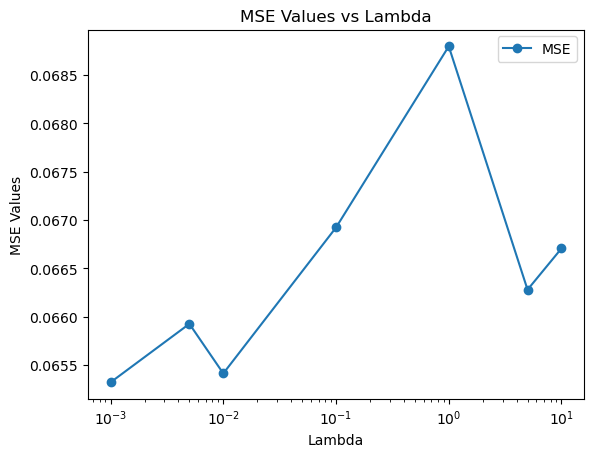

In [65]:
# Plotting MSE for Ridge Regression
plt.plot(lambda_values, mse_rr_values, label='MSE', marker='o')
plt.xlabel('Lambda')
plt.ylabel('MSE Values')
plt.title('MSE Values vs Lambda')
plt.xscale('log')
plt.legend()
plt.show()

# # Plotting RMSE for Ridge Regression
# plt.plot(lambda_values, r_mse_rr_values, label='RMSE', marker='o')
# plt.xlabel('Lambda')
# plt.ylabel('RMSE Values')
# plt.title('RMSE Values vs Lambda')
# plt.xscale('log')
# plt.legend()
# plt.show()

# # Plotting MAE for Ridge Regression
# plt.plot(lambda_values, mae_rr_values, label='MAE', marker='o')
# plt.xlabel('Lambda')
# plt.ylabel('MAE Values')
# plt.title('MAE Values vs Lambda')
# plt.xscale('log')
# plt.legend()
# plt.show()

##### K-Nearest Neighbours Regression

In [66]:
k_values = [1, 5, 10, 15, 20, 25, 30, 35]

mse_NN_results = []
r_mse_NN_results = []
mae_NN_results = []

for j in nn_metrics:
    mse_NN_values = []
    r_mse_NN_values = []
    mae_NN_values = []

    print("Metric Used: ", j)

    for i in k_values:
        mse_NN, r_mse_NN, mae_NN = k_fold_nn(x_train_final, y_train_final, 5, Nearest_Neighbors, i, j)

        mse_NN_values.append(mse_NN)
        r_mse_NN_values.append(r_mse_NN)
        mae_NN_values.append(mae_NN)

        print("Mean Squared Error for k = ", i, ": ", mse_NN)
        print("Root Mean Squared Error for k = ", i, ": ", r_mse_NN)
        print("Mean Absolute Error for k = ", i, ": ", mae_NN)
        print("")
    
    mse_NN_results.append(mse_NN_values)
    r_mse_NN_results.append(r_mse_NN_values)
    mae_NN_results.append(mae_NN_values)

mse_NN_results = np.array(mse_NN_results)
r_mse_NN_results = np.array(r_mse_NN_results)
mae_NN_results = np.array(mae_NN_results)

best_mse_NN = np.min(mse_NN_results)
best_rmse_NN = np.min(r_mse_NN_results)
best_mae_NN = np.min(mae_NN_results)


print("")
print("Minimum Mean Squared Error:", best_mse_NN)
print("Minimum Root Mean Squared Error:", best_rmse_NN)
print("Minimum Mean Absolute Error:", best_mae_NN)


    # mse_NN_values.append(mse_NN)
    # r_mse_NN_values.append(r_mse_NN)
    # mae_NN_values.append(mae_NN)


# mse_NN = min(mse_NN_values)
# r_mse_NN = min(r_mse_NN_values)
# mae_NN = min(mae_NN_values)

Metric Used:  euclidean
Mean Squared Error for k =  1 :  0.12936267605633806
Root Mean Squared Error for k =  1 :  0.35939570350053635
Mean Absolute Error for k =  1 :  0.2740140845070422

Mean Squared Error for k =  5 :  0.0840381690140845
Root Mean Squared Error for k =  5 :  0.2894219162721591
Mean Absolute Error for k =  5 :  0.21973239436619715

Mean Squared Error for k =  10 :  0.08356169014084514
Root Mean Squared Error for k =  10 :  0.287727664509422
Mean Absolute Error for k =  10 :  0.21380281690140834

Mean Squared Error for k =  15 :  0.08498949921752726
Root Mean Squared Error for k =  15 :  0.29142189394551143
Mean Absolute Error for k =  15 :  0.21339436619718294

Mean Squared Error for k =  20 :  0.0882960739436621
Root Mean Squared Error for k =  20 :  0.2961584998846287
Mean Absolute Error for k =  20 :  0.21545070422535212

Mean Squared Error for k =  25 :  0.09084560563380281
Root Mean Squared Error for k =  25 :  0.2983602579496261
Mean Absolute Error for k =  25 

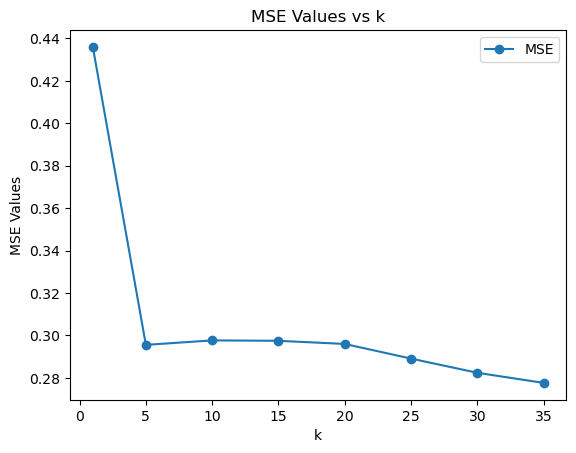

In [67]:
# Plotting MSE for NN
plt.plot(k_values, mse_NN_values, label='MSE', marker='o')
plt.xlabel('k')
plt.ylabel('MSE Values')
plt.title('MSE Values vs k')
plt.legend()
plt.show()

# # Plotting RMSE for NN
# plt.plot(k_values, r_mse_NN_values, label='RMSE', marker='o')
# plt.xlabel('k')
# plt.ylabel('RMSE Values')
# plt.title('RMSE Values vs k')
# plt.legend()
# plt.show()

# # Plotting MAE for NN
# plt.plot(k_values, mae_NN_values, label='MAE', marker='o')
# plt.xlabel('k')
# plt.ylabel('MAE Values')
# plt.title('MAE Values vs k')
# plt.legend()
# plt.show()

##### Support Vector Regression (SVR)

In [68]:
def svr(train_data, train_label, val_data, val_label, kernel_type, C_value, epsilon_value):
    svr_model = SVR(kernel = kernel_type, C = C_value, epsilon = epsilon_value)

    svr_model.fit(train_data, train_label)

    svr_pred = svr_model.predict(val_data)

    return svr_pred

In [69]:
def k_fold_svr(data, labels, num_folds, kernel_type, c_value, epsilon):
    kf = KFold(n_splits = num_folds, shuffle = True)

    mse = []
    rmse = []
    mae = []

    #from k-fold, split data into training and validation
    for train_index, test_index in kf.split(data):
        x_train, x_val = data.iloc[train_index].values, data.iloc[test_index].values
        y_train, y_val = labels.iloc[train_index].values.ravel(), labels.iloc[test_index].values.ravel()

        # model_predictions = model(x_train, y_train, x_val, y_val, model_parameters)

        # model_mse, model_rmse, model_mae = compute_metrics(y_val, model_predictions)

        svr_predictions = svr(x_train, y_train.ravel(), x_val, y_val.ravel(), kernel_type, c_value, epsilon)

        mse_svr, r_mse_svr, mae_svr = compute_metrics(y_val, svr_predictions)

        mse.append(mse_svr)
        rmse.append(r_mse_svr)
        mae.append(mae_svr)

    mean_mse = np.mean(mse)
    mean_rmse = np.mean(rmse)
    mean_mae = np.mean(mae)

    return mean_mse, mean_rmse, mean_mae

In [70]:
kernel_types = ['rbf', 'linear', 'poly', 'sigmoid']

C = 0.1
epsilon = 0.01

# C_values = [0.1, 1, 5, 10]
# epsilon_values = [0.01, 0.1, 0.5, 1]

for i in kernel_types:
    mse_svr, r_mse_svr, mae_svr = k_fold_svr(x_train_final, y_train_final, 5, i, C, epsilon)
    # svr_predictions = svr(x_train, y_train.ravel(), x_val, y_val.ravel(), i, C, epsilon)

    # mse_svr, r_mse_svr, mae_svr = compute_metrics(y_val, svr_predictions)

    print("Mean Squared Error for", i, "Kernel:", mse_svr)
    print("Root Mean Squared Error for", i, "Kernel:", r_mse_svr)
    print("Mean Absolute Error for", i, "Kernel:", mae_svr)
    print("")


Mean Squared Error for rbf Kernel: 0.11185067733712044
Root Mean Squared Error for rbf Kernel: 0.3326488204993887
Mean Absolute Error for rbf Kernel: 0.21703323605989175

Mean Squared Error for linear Kernel: 0.06681353045310619
Root Mean Squared Error for linear Kernel: 0.2580481274697853
Mean Absolute Error for linear Kernel: 0.19636224704306748

Mean Squared Error for poly Kernel: 0.12530878425998876
Root Mean Squared Error for poly Kernel: 0.3514116561845124
Mean Absolute Error for poly Kernel: 0.24318053799972833

Mean Squared Error for sigmoid Kernel: 6.258407318706313
Root Mean Squared Error for sigmoid Kernel: 2.4847202985944694
Mean Absolute Error for sigmoid Kernel: 1.3682012231921337



In [71]:
#we see that linear Kernel has the lowest error 

C_values = [0.001, 0.01, 0.1, 1, 5, 10, 20, 50]

mse_svr_C_values = []

for i in C_values:
    mse_svr_C, r_mse_svr_C, mae_svr_C = k_fold_svr(x_train_final, y_train_final, 5, 'linear', i, 0.01)

    mse_svr_C_values.append(mse_svr_C)

    print("Mean Squared Error for C =", i, ":", mse_svr_C)

Mean Squared Error for C = 0.001 : 0.0950336495407073
Mean Squared Error for C = 0.01 : 0.07200992273503645
Mean Squared Error for C = 0.1 : 0.0673502298036557
Mean Squared Error for C = 1 : 0.06743429979192053
Mean Squared Error for C = 5 : 0.06759345224501476
Mean Squared Error for C = 10 : 0.06685466738730104
Mean Squared Error for C = 20 : 0.06810281616741692
Mean Squared Error for C = 50 : 0.06572713353686195


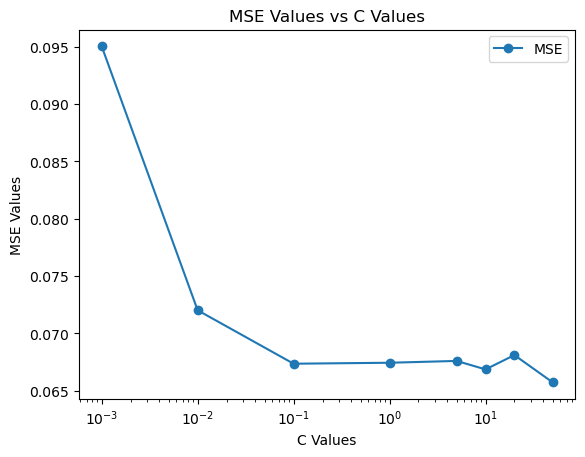

In [72]:
# Plotting MSE for SVR a RBF Kernel: Epsilon = 0.01, C Changes
plt.plot(C_values, mse_svr_C_values, label='MSE', marker='o')
plt.xlabel('C Values')
plt.ylabel('MSE Values')
plt.title('MSE Values vs C Values')
plt.xscale('log')
plt.legend()
plt.show()

In [73]:
#Lower values of C gives the best MSE

epsilon_values = [0.001, 0.01, 0.1, 0.2, 0.5, 1, 2, 5, 10]
C = 10

mse_svr_values = []
r_mse_svr_values = []
mae_svr_values = []

for i in epsilon_values:
    mse_svr_E, r_mse_svr_E, mae_svr_E = k_fold_svr(x_train_final, y_train_final, 5, 'linear', C, i)

    mse_svr_values.append(mse_svr_E)
    r_mse_svr_values.append(r_mse_svr_E)
    mae_svr_values.append(mae_svr_E)

    print("Mean Squared Error for epsilon =", i, ":", mse_svr_E)

Mean Squared Error for epsilon = 0.001 : 0.06617614671038272
Mean Squared Error for epsilon = 0.01 : 0.06763013281617379
Mean Squared Error for epsilon = 0.1 : 0.06765440909949227
Mean Squared Error for epsilon = 0.2 : 0.06762026055615435
Mean Squared Error for epsilon = 0.5 : 0.07417872572486817
Mean Squared Error for epsilon = 1 : 0.10228723966409663
Mean Squared Error for epsilon = 2 : 0.6411952513841674
Mean Squared Error for epsilon = 5 : 1.0594366197183063
Mean Squared Error for epsilon = 10 : 1.0566690140845032


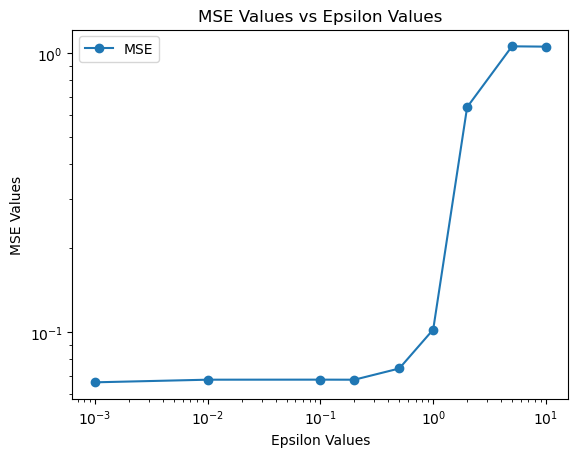

In [74]:
# Plotting MSE for SVR a RBF Kernel: C = 10, Epsilon Changes
plt.plot(epsilon_values, mse_svr_values, label='MSE', marker='o')
plt.xlabel('Epsilon Values')
plt.ylabel('MSE Values')
plt.title('MSE Values vs Epsilon Values')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

In [75]:
# SVR on best metrics
kernel = 'linear'
C = 10
epsilon = 0.1

mse_svr_best, r_mse_svr_best, mae_svr_best = k_fold_svr(x_train_final, y_train_final, 5, kernel, C, epsilon)
print(f"Best MSE for SVR: {mse_svr_best}")
print(f"Best RMSE for SVR: {r_mse_svr_best}")
print(f"Best MAE for SVR: {mae_svr_best}")

Best MSE for SVR: 0.06489365770227352
Best RMSE for SVR: 0.25422776590758966
Best MAE for SVR: 0.19383855890363494


##### Multi Layer Perceptron (MLP)

Epoch [1/50], Loss: 13.0580
Epoch [2/50], Loss: 3.9402
Epoch [3/50], Loss: 0.8901
Epoch [4/50], Loss: 0.9319
Epoch [5/50], Loss: 2.0431
Epoch [6/50], Loss: 0.1199
Epoch [7/50], Loss: 0.2192
Epoch [8/50], Loss: 0.1067
Epoch [9/50], Loss: 0.1816
Epoch [10/50], Loss: 0.2301
Epoch [11/50], Loss: 0.3607
Epoch [12/50], Loss: 0.1869
Epoch [13/50], Loss: 0.1232
Epoch [14/50], Loss: 0.0758
Epoch [15/50], Loss: 0.2737
Epoch [16/50], Loss: 0.0818
Epoch [17/50], Loss: 0.0867
Epoch [18/50], Loss: 0.2426
Epoch [19/50], Loss: 0.1123
Epoch [20/50], Loss: 0.0458
Epoch [21/50], Loss: 0.2082
Epoch [22/50], Loss: 0.0765
Epoch [23/50], Loss: 0.0705
Epoch [24/50], Loss: 0.0793
Epoch [25/50], Loss: 0.0659
Epoch [26/50], Loss: 0.1034
Epoch [27/50], Loss: 0.0242
Epoch [28/50], Loss: 0.1372
Epoch [29/50], Loss: 0.0198
Epoch [30/50], Loss: 0.1891
Epoch [31/50], Loss: 0.0875
Epoch [32/50], Loss: 0.0428
Epoch [33/50], Loss: 0.0483
Epoch [34/50], Loss: 0.0528
Epoch [35/50], Loss: 0.1437
Epoch [36/50], Loss: 0.0496


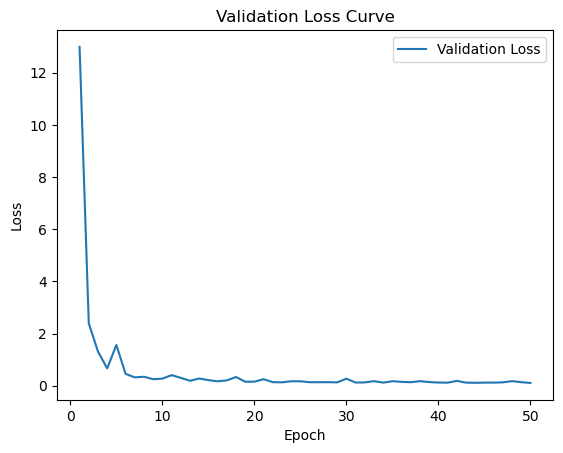

In [238]:
# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the MLP model
class MLP(nn.Module):
    def __init__(self, input_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Convert data to PyTorch tensors and move to GPU
x_train_tensor = torch.tensor(x_train.values, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).to(device)
x_val_tensor = torch.tensor(x_val.values, dtype=torch.float32).to(device)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32).to(device)

# Create DataLoader
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)

# Initialize model, loss function, and optimizer
input_size = x_train.shape[1]  # Number of input features
model = MLP(input_size).to(device)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

val_losses = []
mse_values = []

# Training loop
num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets.view(-1, 1))
        loss.backward()
        optimizer.step()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

    # Evaluate on validation set
    model.eval()
    with torch.no_grad():
        y_pred = model(x_val_tensor)
        val_loss = criterion(y_pred, y_val_tensor.view(-1, 1))
        val_losses.append(val_loss.item())
        y_pred = model(x_val_tensor)
        mse_mlp = mean_squared_error(y_val_tensor.cpu().numpy(), y_pred.cpu().numpy())
        r_mse_mlp = mean_squared_error(y_val_tensor.cpu().numpy(), y_pred.cpu().numpy(), squared=False)
        mae_mlp = mean_absolute_error(y_val_tensor.cpu().numpy(), y_pred.cpu().numpy())
        mse_values.append(mse_mlp)
print(f'Validation Loss: {val_losses[-1]:.4f}')
print(f'MSE: {mse_mlp:.4f}')
print(f'RMSE: {r_mse_mlp:.4f}')
print(f'MAE: {mae_mlp:.4f}')

# Plot the validation loss curve
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Loss Curve')
plt.legend()
plt.show()

mse_mlp = mse_values[-1]
r_mse_mlp = np.sqrt(mse_mlp)
mae_mlp = mean_absolute_error(y_val_tensor.cpu().numpy(), y_pred.cpu().numpy())

#### K-Means + RBF Network

In [77]:
def MSE_linear_reg_rbf_network(x_train, x_val, y_train, y_val): # perform linear regression for the 2nd layer in rbf network
    
    MSE_lin_reg = LinearRegression()
    MSE_lin_reg.fit(x_train,y_train)
    y_pred = MSE_lin_reg.predict(x_val)

    return y_pred

In [78]:
def RBF_kernel_cluster(X, centre, gamma_val): # rbf kernel function with gamma passed
    rbf = rbf_kernel(X, centre, gamma=gamma_val) 
    return rbf

In [79]:
def k_means_clustering(X, y, k): # perform k means clustering 
    warnings.filterwarnings("ignore", category=UserWarning)
    kmeans = KMeans(n_clusters=k, init="random", n_init=10) # perform k mean clustering 10 times with random intialisations
    kmeans.fit(X)
    centres = kmeans.cluster_centers_ # get the centres
    return centres

In [80]:
def RBF_kernel_k_cluster_net(X, y, cluster, gamma_val): # rbf network function with cluster parameter
    rbf_rmse_vals = []
    training_rmse_vals = []
    validation_rmse_vals = []
    k_folds = KFold(n_splits = 5, shuffle=True) 

    # for each fold, split the data into train and validation sets based on configuration for 'k_folds'
    for i, (train_index, test_index) in enumerate(k_folds.split(X)): 
        x_train, x_val = X[train_index], X[test_index]
        y_train, y_val = y[train_index], y[test_index]

        X_rbf = RBF_kernel_cluster(x_train, cluster, gamma_val)
        X_rbf_val = RBF_kernel_cluster(x_val, cluster, gamma_val)

        RBF_net_y_pred = MSE_linear_reg_rbf_network(X_rbf, X_rbf_val, y_train, y_val)

        mse_rbf_net, r_mse_rbf_net, mae_rbf_net = compute_metrics(y_val, RBF_net_y_pred)
        rbf_rmse_vals.append(r_mse_rbf_net)

        RBF_net_y_train_pred = MSE_linear_reg_rbf_network(X_rbf, X_rbf, y_train, y_train)  # Predictions on training set
        RBF_net_y_val_pred = MSE_linear_reg_rbf_network(X_rbf, X_rbf_val, y_train, y_val)  # Predictions on validation set

        # Calculate RMSE for training and validation sets
        training_mse_rbf_net, training_r_mse_rbf_net, training_mae_rbf_net = compute_metrics(y_train, RBF_net_y_train_pred)
        validation_mse_rbf_net, validation_r_mse_rbf_net, validation_mae_rbf_net = compute_metrics(y_val, RBF_net_y_val_pred)

        training_rmse_vals.append(training_r_mse_rbf_net)
        validation_rmse_vals.append(validation_r_mse_rbf_net)

    return np.mean(validation_rmse_vals), np.mean(training_rmse_vals)

In [242]:
best_gamma_d = None
best_gamma = None
best_k = None
best_rmse_mean = float('inf')

best_gamma_for_k = {}
best_rmse_mean_for_k = {}

K = np.arange(10,110,10) # values of K
gamma_ds = [1,5,10,15,20] # values of gamma_d
for gamma_d in gamma_ds: # changing different values of gamma_d
    gammas = [0.01*gamma_d, 0.1*gamma_d, 1*gamma_d, 10*gamma_d, 100*gamma_d]
    for k in K:
        rbf_net_rmses_val = []
        rbf_net_rmses_train = []
        centres = k_means_clustering(np.array(x_train_final), np.array(y_train_final), k) # get cluster centres for each value of k
        for gamma in gammas:
            # perform rbf transform for different gamma values with current k centres
            rmse_mean_val, rmse_mean_train = RBF_kernel_k_cluster_net(np.array(x_train_final), np.array(y_train_final), centres, gamma) 
            
            # extract values from the function
            rbf_rmse_val = rmse_mean_val
            rbf_rmse_train = rmse_mean_train
            rbf_net_rmses_val.append(rbf_rmse_val)
            rbf_net_rmses_train.append(rbf_rmse_train)

            # Update best parameters
            if rmse_mean_val < best_rmse_mean:
                best_rmse_mean = rmse_mean_val
                best_gamma_d = gamma_d
                best_gamma = gamma
                best_k = k
                best_rbf_net_rmse_val = rbf_net_rmses_val
                best_rbf_net_rmse_train = rbf_net_rmses_train

        print("K is:" , k, "gamma_d is: ", gamma_d, "rbf_net_rmses_vals for current k and gamma_d is: ", rbf_net_rmses_val)

        # getting best RMSE and std values for each optimal gamma and optimal K
        best_gamma_for_k[k] = gammas[np.argmin(rbf_net_rmses_val)]  # Select the gamma with minimum RMSE
        best_rmse_mean_for_k[k] = min(rbf_net_rmses_val)  # Minimum RMSE

print("\n------------------------Final results------------------------")
print(f"best_rmse_mean {best_rmse_mean},\nbest_gamma_d {best_gamma_d}, best_gamma {best_gamma}, best_k {best_k},\nbest_rmse_vals {best_rbf_net_rmse_val}")

K is: 10 gamma_d is:  1 rbf_net_rmses_vals for current k and gamma_d is:  [0.2684813686306428, 0.3260822354927102, 0.4334977512612864, 5.501544324128899, 21655911.38725298]
K is: 20 gamma_d is:  1 rbf_net_rmses_vals for current k and gamma_d is:  [0.25615172921441903, 0.3152986920253697, 0.44174220531241354, 317911.88308580796, 236793.10087462986]
K is: 30 gamma_d is:  1 rbf_net_rmses_vals for current k and gamma_d is:  [0.2542983116234902, 0.3030102070377656, 0.623925862656865, 33735.72990833047, 1.743307550072452e+17]
K is: 40 gamma_d is:  1 rbf_net_rmses_vals for current k and gamma_d is:  [0.24705501726412576, 0.3058342743913678, 0.6383490931095578, 1043.7162409887305, 391021848689163.75]
K is: 50 gamma_d is:  1 rbf_net_rmses_vals for current k and gamma_d is:  [0.2575599199360198, 0.2916235650050645, 1.1387200753651399, 408465284.3201335, 4.806772514217203]
K is: 60 gamma_d is:  1 rbf_net_rmses_vals for current k and gamma_d is:  [0.25831551011081577, 0.31634379731399365, 13563.40

c:\Users\henry\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:446: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)
c:\Users\henry\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:446: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0, weights=sample_weight)


K is: 70 gamma_d is:  20 rbf_net_rmses_vals for current k and gamma_d is:  [0.3632774620126407, 1417645403.560741, 15509801.361100147, 0.4869737154051498, inf]
K is: 80 gamma_d is:  20 rbf_net_rmses_vals for current k and gamma_d is:  [0.3450501589671068, 554855.2169144719, 9674.267328906806, 0.4840001557310689, 0.4858104461302076]
K is: 90 gamma_d is:  20 rbf_net_rmses_vals for current k and gamma_d is:  [0.32247038216347257, 2258791758.7098875, 11872531849487.734, 20812378641940.06, 36495732696140.75]
K is: 100 gamma_d is:  20 rbf_net_rmses_vals for current k and gamma_d is:  [0.4922079512421728, 74061628542.363, 321877527.99589705, 0.48675442518404577, 0.48438342121170697]

------------------------Final results------------------------
best_rmse_mean 0.24705501726412576,
best_gamma_d 1, best_gamma 0.01, best_k 40,
best_rmse_vals [0.24705501726412576, 0.3058342743913678, 0.6383490931095578, 1043.7162409887305, 391021848689163.75]


In [244]:
best_gamma_d = 1
best_gamma = 0.01
best_k = 40

centres = k_means_clustering(np.array(x_train), np.array(y_train), best_k)

X_rbf = RBF_kernel_cluster(x_train, centres, best_gamma)
X_rbf_val = RBF_kernel_cluster(x_val, centres, best_gamma)

RBF_net_y_pred = MSE_linear_reg_rbf_network(X_rbf, X_rbf_val, y_train, y_val)

mse_rbf_net, r_mse_rbf_net, mae_rbf_net = compute_metrics(y_val, RBF_net_y_pred)

print(f"Best MSE for RBF network: {mse_rbf_net}")
print(f"Best RMSE for RBF network: {r_mse_rbf_net}")
print(f"Best MAE for RBF network: {mae_rbf_net}")

Best MSE for RBF network: 0.06070594562718256
Best RMSE for RBF network: 0.24638576587778474
Best MAE for RBF network: 0.18692489660631675


#### Out-of-Class Models

##### Random Forest

In [88]:
def k_fold_rf(data, labels, num_folds, num_trees, num_max_depth, num_samples_split, num_max_features):
    kf = KFold(n_splits = num_folds, shuffle = True)

    mse = []
    rmse = []
    mae = []

    #from k-fold, split data into training and validation
    for train_index, test_index in kf.split(data):
        x_train, x_val = data.iloc[train_index].values, data.iloc[test_index].values
        y_train, y_val = labels.iloc[train_index].values.ravel(), labels.iloc[test_index].values.ravel()

        random_forest_model = RandomForestRegressor(n_estimators = num_trees, max_depth = num_max_depth, min_samples_split = num_samples_split, max_features = num_max_features, random_state = 42)
        random_forest_model.fit(x_train, y_train)
        predictions = random_forest_model.predict(x_val)

        model_mse, model_rmse, model_mae = compute_metrics(y_val, predictions)

        mse.append(model_mse)
        rmse.append(model_rmse)
        mae.append(model_mae)

    mean_mse = np.mean(mse)
    mean_rmse = np.mean(rmse)
    mean_mae = np.mean(mae)

    return mean_mse, mean_rmse, mean_mae

In [89]:
def random_forest(train_data, train_label, val_data, val_label, num_trees, num_max_depth, num_samples_split, num_max_features):
    hyper_params_rf = {
    'bootstrap': True,
    'criterion': 'mse',
    'min_sample_leaf': 10,
    'n_estimators': num_trees,
    "max_depth": num_max_depth,
    "min_samples_split": num_samples_split,  
    "max_features": num_max_features,
    "random_state": 42,
    "verbose": -1
    }
    # random_forest_model = RandomForestRegressor(n_estimators = num_trees, max_depth = num_max_depth, min_samples_split = num_samples_split, max_features = num_max_features, random_state = 42)
    random_forest_model = RandomForestRegressor(**hyper_params_rf)
    random_forest_model.fit(train_data, train_label)
    predictions = random_forest_model.predict(val_data)

    return predictions

In [90]:
max_depth_values = [10, 20, 50]
num_trees = [300, 500]

mse_rf_values = []
r_mse_rf_values = []
mae_rf_values = []
for j in num_trees:
    for i in max_depth_values:
        mse_rf, r_mse_rf, mae_rf = k_fold_rf(x_train_final_Univ, y_train_final_Univ, num_folds=10, num_trees=j, num_max_depth=i, num_samples_split=5, num_max_features=1.0)
        
        print(f"Num Trees: {j}")
        print(f"Max Depth: {i}")

        mse_rf_values.append(mse_rf)
        r_mse_rf_values.append(r_mse_rf)
        mae_rf_values.append(mae_rf)

        print("\tMean Squared Error: ", mse_rf)
        print("\tRoot Mean Squared Error: ", r_mse_rf)
        print("\tMean Absolute Error :", mae_rf)

mse_rf = min(mse_rf_values)
r_mse_rf = min(r_mse_rf_values)
mae_rf = min(mae_rf_values)

Num Trees: 300
Max Depth: 10
	Mean Squared Error:  0.067037561020722
	Root Mean Squared Error:  0.2577889213228433
	Mean Absolute Error : 0.19889546338739883
Num Trees: 300
Max Depth: 20
	Mean Squared Error:  0.06728493097051455
	Root Mean Squared Error:  0.2574337058360296
	Mean Absolute Error : 0.1986780452821038
Num Trees: 300
Max Depth: 50
	Mean Squared Error:  0.06798236728328363
	Root Mean Squared Error:  0.2592414094376226
	Mean Absolute Error : 0.1998508197852118
Num Trees: 500
Max Depth: 10
	Mean Squared Error:  0.06742442642160824
	Root Mean Squared Error:  0.2577265402033086
	Mean Absolute Error : 0.19773055965333117
Num Trees: 500
Max Depth: 20
	Mean Squared Error:  0.06760581077421839
	Root Mean Squared Error:  0.2585950638490451
	Mean Absolute Error : 0.19886454260527991
Num Trees: 500
Max Depth: 50
	Mean Squared Error:  0.06472028680686832
	Root Mean Squared Error:  0.2539570158079879
	Mean Absolute Error : 0.1954708534718397


##### Gradient Boosting

In [91]:
# warnings.filterwarnings("ignore", message="Found `num_iterations` in params.*") # suppress warnings

hyper_params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'l1',
    'learning_rate': 0.001,
    "max_depth": 4,
    "num_leaves": 256,  
    "num_iterations": 10000,
    "early_stopping_rounds": 1000
}

gbm = lgb.LGBMRegressor(**hyper_params, verbose=-1)

gbm.fit(x_train, y_train,
        eval_set=[(x_val, y_val)],
        eval_metric='l1')

y_pred = gbm.predict(x_val, num_iteration=gbm.best_iteration_)

mse_gb, r_mse_gb, mae_gb = compute_metrics(y_val, y_pred)

print("Mean Squared Error for all features: ", mse_gb)
print("Root Mean Squared Error for all features: ", r_mse_gb)
print("Mean Absolute Error for all features: ", mae_gb)

Mean Squared Error for all features:  0.064586179917662
Root Mean Squared Error for all features:  0.25413811189520946
Mean Absolute Error for all features:  0.1871018732795251


### Results 

In [245]:
#here we compare all the metrics results from all the models, and then pick the model that has the best metrics
model_names = ['Trivial', 'Linear Regression', '1NN', 'Ridge Regression', 'Lasso Regression', 'KNN', 'SVR', 'Random Forest', 'LightGBM', 'MLP', 'RBF Network']
all_MSE = [mse, mse_all, best_mse_oneNN, best_mse_rr, mse_las, best_mse_NN, mse_svr_best, mse_rf, mse_gb, mse_mlp, mse_rbf_net]
all_RMSE = [r_mse, r_mse_all, best_rmse_oneNN, best_rmse_rr, r_mse_las, best_rmse_NN, r_mse_svr_best, r_mse_rf, r_mse_gb, r_mse_mlp, r_mse_rbf_net]
all_MAE = [mae, mae_all, best_mae_oneNN, best_mae_rr, mae_las, best_mae_NN, mae_svr_best, mae_rf, mae_gb, mae_mlp, mae_rbf_net]

model_metrics = {'Model':model_names, 'MSE':all_MSE, 'RMSE':all_RMSE, 'MAE':all_MAE}
model_metrics_df = pd.DataFrame(model_metrics, columns=['Model', 'MSE', 'RMSE', 'MAE'])
model_metrics_df_sorted = model_metrics_df.sort_values(by='MSE')
model_metrics_df_sorted.reset_index(drop=True, inplace=True)

best_model = model_metrics_df_sorted.iloc[0]['Model']
print(f"Best performing model is: {best_model}")
model_metrics_df_sorted

Best performing model is: RBF Network


,Model,MSE,RMSE,MAE
0,RBF Network,0.060706,0.246386,0.186925
1,Random Forest,0.064720,0.253957,0.195471
2,SVR,0.064894,0.254228,0.193839
3,Ridge Regression,0.064957,0.254420,0.195905
4,Lasso Regression,0.065716,0.255907,0.197458
5,LightGBM,0.067003,0.258849,0.193860
6,Linear Regression,0.067485,0.259778,0.208090
7,KNN,0.082908,0.286888,0.210965
8,MLP,0.105099,0.324190,0.245161
9,1NN,0.117908,0.341479,0.265775


### Final Prediction on Test Set

In [94]:
# train that model we select from above on the entire training set, and then finalise it on the test
test_data_path = 'data/FLIR_groups1and2_test.csv'

test_data = pd.read_csv(test_data_path, skiprows = 2)

test_data_set = test_data.iloc[:, 2:] # remove first 2 columns

#Seperate by Rounds
round_1_test = test_data_set.iloc[:, :27]
round_2_test = test_data_set.iloc[:, 28:55]
round_3_test = test_data_set.iloc[:, 56:83]
round_4_test = test_data_set.iloc[:, 84:111]

In [95]:
catagorical_features_test = test_data_set[['Gender', 'Age', 'Ethnicity',]]

extra_features_test = test_data_set[['T_atm', 'Humidity', 'Distance']]

target_test = test_data_set['aveOralM']

In [96]:
# One-Hot-Encoding
catagorical_features_copy_test = catagorical_features_test.copy()

# extra_features = pd.get_dummies(extra_features, columns=['Gender', 'Age', 'Ethnicity'])
catagorical_features_ohe_test = pd.get_dummies(catagorical_features_copy_test, columns=['Gender', 'Age', 'Ethnicity'], dtype=int)

In [97]:
# Clean 'Distance' column and replace non-numeric characters with NaN
extra_features_test = extra_features_test.copy()
extra_features_test['Distance'] = pd.to_numeric(extra_features_test['Distance'], errors='coerce')

# Calculate the mean of the 'Distance' column
mean_distance_test = extra_features_test['Distance'].mean()

# Replace values greater than 1 with the mean
extra_features_test.loc[(extra_features_test['Distance'].isnull()) | (extra_features_test['Distance'] > 1), 'Distance'] = mean_distance_test

In [98]:
#standardize the extra features

extra_features_stand_test = (extra_features_test - extra_features_test.mean()) / extra_features_test.std()

In [99]:
#Function to find empty rows 
def find_empty(round):
    empty_rows = []
    
    for i, row in round.iterrows():
        if row.isnull().all() or row.isna().any().any():
            empty_rows.append(i)
            
    return empty_rows
    
#find empty rows in each round
round_1_empty_rows_test = find_empty(round_1_test)
round_2_empty_rows_test = find_empty(round_2_test)
round_3_empty_rows_test = find_empty(round_3_test)
round_4_empty_rows_test = find_empty(round_4_test)

#Compute the means of every feature
round_1_means_test = (round_1_test.mean()).values  #dtype is float64
round_2_means_test = (round_2_test.mean()).values
round_3_means_test = (round_3_test.mean()).values
round_4_means_test = (round_4_test.mean()).values

In [100]:
#Function to insert means into missing rows 
def insert_mean(round_num, empty_rows, mean):
    rounds_final = round_num
    
    for i in empty_rows:
        rounds_final.loc[i] = mean

    return rounds_final  
    
#insert mean array into each empty row
final_round_1_test = insert_mean(round_1_test, round_1_empty_rows_test, round_1_means_test)
final_round_2_test = insert_mean(round_2_test, round_2_empty_rows_test, round_2_means_test)
final_round_3_test = insert_mean(round_3_test, round_3_empty_rows_test, round_3_means_test)
final_round_4_test = insert_mean(round_4_test, round_4_empty_rows_test, round_4_means_test)

#check if there are any empty rows after inserting
test_empty_1_test = find_empty(final_round_1_test)
print(test_empty_1_test)
test_empty_2_test = find_empty(final_round_2_test)
print(test_empty_2_test)
test_empty_3_test = find_empty(final_round_3_test)
print(test_empty_3_test)
test_empty_4_test = find_empty(final_round_4_test)
print(test_empty_4_test)

# test_empty_extra = find_empty(extra_features)
# print(test_empty_extra)

[]
[]
[]
[]


In [101]:
# Build and standardise dataset with means from the 4 rounds (NO encoded features yet)
final_dataset_means_test = pd.DataFrame()

for i in range(final_round_1_test.iloc[0, :].size):
    avg_values_test = (final_round_1_test.iloc[:, i] + final_round_2_test.iloc[:, i] + final_round_3_test.iloc[:, i] + final_round_4_test.iloc[:, i]) / 4
    
    final_dataset_means_test = pd.concat([final_dataset_means_test, avg_values_test], axis = 1)

# Standardise data set
final_dataset_means_stand_test = (final_dataset_means_test - final_dataset_means_test.mean()) / final_dataset_means_test.std()

col_names = ['T_offset_1','Max1R13_1','Max1L13_1','aveAllR13_1','aveAllL13_1','T_RC_1','T_RC_Dry_1','T_RC_Wet_1','T_RC_Max_1','T_LC_1','T_LC_Dry_1','T_LC_Wet_1','T_LC_Max_1','RCC_1','LCC_1','canthiMax_1','canthi4Max_1','T_FHCC_1','T_FHRC_1','T_FHLC_1','T_FHBC_1','T_FHTC_1','T_FH_Max_1','T_FHC_Max_1','T_Max_1','T_OR_1','T_OR_Max_1']

final_dataset_means_stand_test.columns = col_names
print(final_dataset_means_stand_test.shape)

features_plus_extra_test = pd.concat([final_dataset_means_stand_test, extra_features_stand_test], axis = 1)

print(features_plus_extra_test.shape)
# features_plus_extra_test

#final_dataset_means_stand has standardized features without encoded features or labels

#features_plus_extra has standardized features AND standardized extra features without encoded features or labels

(310, 27)
(310, 30)


In [102]:
# Build final dataset with encoded features
preprocessed_dataset_nolabel_test = pd.concat([features_plus_extra_test, catagorical_features_ohe_test], axis=1)

preprocessed_dataset_test = pd.concat([preprocessed_dataset_nolabel_test, target_test], axis=1)

# Identify missing columns in preprocessed_dataset_test
missing_columns = set(preprocessed_dataset.columns) - set(preprocessed_dataset_test.columns)

# Add missing columns to preprocessed_dataset_test and fill with zeros
for column in missing_columns:
    preprocessed_dataset_test[column] = 0

# Reorder columns to match preprocessed_dataset
preprocessed_dataset_test = preprocessed_dataset_test.reindex(columns=preprocessed_dataset.columns, fill_value=0)

print(preprocessed_dataset_test.shape)
preprocessed_dataset_test


#raw_dataset has standardized features + encoded features + labels

(310, 47)


,T_offset_1,Max1R13_1,Max1L13_1,aveAllR13_1,aveAllL13_1,T_RC_1,T_RC_Dry_1,T_RC_Wet_1,T_RC_Max_1,T_LC_1,...,Age_41-50,Age_51-60,Age_>60,Ethnicity_American Indian or Alaskan Native,Ethnicity_Asian,Ethnicity_Black or African-American,Ethnicity_Hispanic/Latino,Ethnicity_Multiracial,Ethnicity_White,aveOralM
0,0.112689,-0.132652,-0.656983,0.458191,-0.147130,-0.296224,-0.143941,-0.450645,-0.321348,-0.630847,...,0,0,0,0,1,0,0,0,0,36.74
1,-1.162964,0.696127,0.891717,0.754782,1.111774,0.714375,0.843429,-0.052838,0.685681,0.790188,...,0,0,0,0,0,0,0,0,1,37.69
2,-0.634034,3.133951,2.419027,2.853483,2.234263,3.242970,3.104955,3.314166,3.270388,2.420454,...,0,0,0,0,1,0,0,0,0,39.34
3,-0.428685,-0.310537,-0.152158,-0.109200,-0.209490,-0.455572,-0.311916,-0.606487,-0.459815,-0.225460,...,0,0,0,0,1,0,0,0,0,36.99
4,-0.360236,-1.531470,-1.807813,-1.092462,-1.421623,-1.700999,-1.516425,-2.119794,-1.680837,-1.881880,...,1,0,0,0,0,0,0,0,1,36.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,0.498496,-0.063924,-0.109376,-0.118871,-0.143232,-0.015269,-0.025129,0.111206,-0.027631,0.088389,...,0,0,0,0,1,0,0,0,0,36.99
306,1.108320,0.485900,0.070307,0.616158,0.156878,0.349553,0.454217,0.316261,0.362592,0.127620,...,0,0,0,0,0,0,0,0,1,37.19
307,-2.220822,1.173181,1.067122,1.186772,1.345626,1.087584,1.130216,1.140582,1.101080,0.960189,...,0,0,0,0,0,1,0,0,0,37.59
308,0.288521,0.133715,-0.131635,-0.397401,-0.812930,0.036596,0.040167,0.103584,0.049290,0.071784,...,0,0,0,0,0,0,1,0,0,37.29


In [103]:
X_test_data = preprocessed_dataset_test.iloc[:, :-1]  # Features
y_test_data = preprocessed_dataset_test.iloc[:, -1]   # Labels

In [104]:
#extract features from x_train and x_val
x_test_select_features = X_test_data[sequential_selected_features].copy()
x_test_select_features


,T_offset_1,Max1R13_1,T_RC_Dry_1,T_RC_Wet_1,LCC_1,T_FHCC_1,T_FHRC_1,T_FHLC_1,T_FHBC_1,T_FH_Max_1,T_Max_1,T_atm,Gender_Female,Ethnicity_Hispanic/Latino,Ethnicity_White
0,0.112689,-0.132652,-0.143941,-0.450645,-0.507684,0.164672,0.499249,0.104498,0.257981,0.077335,-0.159867,-2.219818,1,0,0
1,-1.162964,0.696127,0.843429,-0.052838,0.505364,1.222445,0.703494,0.755812,1.209075,1.243108,1.095780,-0.408914,1,0,1
2,-0.634034,3.133951,3.104955,3.314166,2.460880,3.249524,2.792196,2.560881,2.881039,3.791430,3.529505,-0.408914,0,0,0
3,-0.428685,-0.310537,-0.311916,-0.606487,-0.229511,-1.246975,-1.535501,-1.265122,-0.670469,-1.372655,-0.091994,-0.408914,0,0,0
4,-0.360236,-1.531470,-1.516425,-2.119794,-1.931765,-1.550844,-0.545102,-1.056702,-1.606466,-1.883283,-1.168263,-0.408914,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,0.498496,-0.063924,-0.025129,0.111206,0.164913,0.630092,1.000229,1.027503,0.778818,0.597597,-0.169563,0.970823,1,0,0
306,1.108320,0.485900,0.454217,0.316261,0.268709,0.941654,0.799837,0.759533,0.884495,0.428994,0.669151,0.970823,1,0,1
307,-2.220822,1.173181,1.130216,1.140582,1.215329,1.133977,0.834520,0.770699,1.126043,1.604401,0.737024,2.954194,1,0,0
308,0.288521,0.133715,0.040167,0.103584,0.029064,0.153234,0.297868,0.193870,0.119106,-0.100079,-0.122279,0.367188,0,1,0


##### Run best model on entire training dataset

In [225]:
# warnings.filterwarnings("ignore", message="Found `num_iterations` in params.*") # suppress warnings

hyper_params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'l1',
    'learning_rate': 0.001,
    "max_depth": 4,
    "num_leaves": 256,  
    "num_iterations": 10000,
    "early_stopping_rounds": 1000
}

gbm = lgb.LGBMRegressor(**hyper_params, verbose=-1)

gbm.fit(x_train_final, y_train_final,
        eval_set=[(x_val, y_val)],
        eval_metric='l1')

y_pred = gbm.predict(x_test_select_features, num_iteration=gbm.best_iteration_)

mse_gb, r_mse_gb, mae_gb = compute_metrics(y_test_data, y_pred)

print("Mean Squared Error for all features: ", mse_gb)
print("Root Mean Squared Error for all features: ", r_mse_gb)
print("Mean Absolute Error for all features: ", mae_gb)

Mean Squared Error for all features:  0.06700281348133105
Root Mean Squared Error for all features:  0.25884901676717076
Mean Absolute Error for all features:  0.19385991255357496


In [214]:
# best_gamma = 0.001
# best_k = 50

# kmeans = KMeans(n_clusters=best_k, init='random', n_init=10)
# kmeans.fit(x_train_final)
# centres = kmeans.cluster_centers_
# X_rbf = rbf_kernel(x_train_final, centres, best_gamma)
# X_rbf_test = rbf_kernel(x_test_select_features, centres, best_gamma)
# RBF_net_y_pred = MSE_linear_reg_rbf_network(X_rbf, X_rbf_test, y_train_final, y_test_data)
# mse_rbf_net, r_mse_rbf_net, mae_rbf_net = compute_metrics(y_test_data, RBF_net_y_pred)
# print(f"Best MSE for RBF network: {mse_rbf_net}")
# print(f"Best RMSE for RBF network: {r_mse_rbf_net}")
# print(f"Best MAE for RBF network: {mae_rbf_net}")

Best MSE for RBF network: 0.07757095835561012
Best RMSE for RBF network: 0.27851563395186657
Best MAE for RBF network: 0.21125548421301957


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=498fdfc4-75bb-4c68-a720-cea81bc987b7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>